## <b>Problem Statement:</b>

<b><em>Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.</em></b>

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Downlaod Files:</b>

•	https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
# importing required initial libraries
import numpy as np                 # Basic computation library
import pandas as pd                # for data wrangling purpose
import seaborn as sns              # For Visualization
import matplotlib.pyplot as plt    # For Plotting

import warnings
warnings.filterwarnings("ignore")  # Filtering warnings

In [2]:
# Reading csv file
df=pd.read_csv('Telecom_customer_churn.csv')
pd.set_option('display.max_columns', None) 
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 7043
No. of Columns : 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observations:
- **Datatype for "TotalCharges" is resulted as "object" here but it should be "float" datatype. I will check for non-interpretable values in this column in next steps and impute them and then will convert datatype to "float"**

In [5]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

#### Observations: ####
- **There are float,int and object data types available in the dataset**

In [6]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

#### Observations :
- **There are 7043 rows and 21 columns in the dataset.**
- **Out of 21 columns, there are 2 features with int datatypes,1 with float datatype and rest are object datatypes**
- **Target Variables is 'Churn'.As Per probelm statement,I need to do classificaiton task**

# Data Integrity Check

## Duplicate Values Check

In [7]:
df.duplicated().sum()

0

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

#### Observations: 
- **No duplicate values present in the dataframe**

## Checking for the presense of any non-interpretable values 
- **I am checking all unique values in the dataset for each column and trying to identify any non-interpretable values, so that I can impute them with appropriate technique or I will take a decision to impute or not**
- **This also helps me to identify the empty columns**

In [9]:
# List of columns to compute value counts for
cols = df.columns

# Initialize an empty DataFrame for the value counts
vc = pd.DataFrame()

# Loop over the columns and compute value counts and look for white spaces
for col in cols:
    # I am excluding float and int data types because if any non-interpretable value is exists in any column, its datatype will be changed to "object"
    if df[col].dtype in ['float64', 'int64']: 
        continue
    if df[col].isin([' ']).any():
        print(f"\033[1m\"{col}\" column has white spaces\033[0m")
    vc_col = df[col].value_counts().to_frame().reset_index().rename(columns={'index': col, col: 'count'})
    # # Considering the values only if the count is > 10 as less than that probably indicates non-categorical feature but it is good to check once all the data by putting threshold of 0
    vc_col = vc_col[vc_col['count'] >= 10] 
    vc = pd.concat([vc, vc_col], axis=1).fillna('')

# Drop the 'count' column from the concatenated DataFrame
vc = vc.drop('count', axis=1)

# Store the final output in a DataFrame
vc_df = pd.DataFrame(vc)

# Display the value counts of the columns side by side
# pd.set_option('display.max_rows', None)
display(vc_df)

"TotalCharges" column has white spaces


customerID  gender Partner Dependents PhoneService     MultipleLines  \
0               Male      No         No          Yes                No   
1             Female     Yes        Yes           No               Yes   
2                                                     No phone service   
3                                                                        

  InternetService       OnlineSecurity         OnlineBackup  \
0     Fiber optic                   No                   No   
1             DSL                  Yes                  Yes   
2              No  No internet service  No internet service   
3                                                             

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                   No   
1                  Yes                  Yes                  Yes   
2  No internet service  No internet service  No internet service   
3                                                                  

       StreamingMovies        Contract PaperlessBilling  \
0                   No  Month-to-month              Yes   
1                  Yes        Two year               No   
2  No internet service        One year                    
3                                                         

               PaymentMethod TotalCharges Churn  
0           Electronic check                 No  
1               Mailed check         20.2   Yes  
2  Bank transfer (automatic)                     
3    Credit card (automatic)

### Observations:
- **There are white spaces in "TotalCharges" column which I will address in next steps by replacing with NaN values**
- **I will also check for null values in the next steps**

In [10]:
df["TotalCharges"].isin([' ']).sum() # Checking the count of white spaces in "TotalCharges" column

11

In [11]:
df=df.replace(' ',np.NaN) #replacing ' ' with NaN value

In [12]:
#Rechecking the presence of any whitespaces in the dataset
df.isin([' ']).sum().any()

False

In [13]:
# Changing the datatype of "TotalCharges" to float
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [14]:
# Dropping insignificant column 'customerID' before futher data processing
df.drop(['customerID'],axis=1,inplace=True)

### Re-Checking Duplicate Values 
- **Rechecking duplicate values after dropping 'customerID'. As 'customerID' is unique, I might have not got duplicate rows in my initial check, hence rechecking again**

In [15]:
df.duplicated().sum()

22

In [16]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male              0      No         No       1          Yes   
1338    Male              0      No         No       1          Yes   
1491  Female              0      No         No       1          Yes   
1739    Male              0      No         No       1          Yes   
1932    Male              0      No         No       1          Yes   
2713    Male              0      No         No       1          Yes   
2892    Male              0      No         No       1          Yes   
3301  Female              1      No         No       1          Yes   
3754    Male              0      No         No       1          Yes   
4098    Male              0      No         No       1          Yes   
4476  Female              0      No         No       1          Yes   
5506    Male              0      No         No       1          Yes   
5736    Male              0      No         No       1          Yes   
5759  Female              0      No         No       1          Yes   
6267  Female              0      No         No       1          Yes   
6499    Male              0      No         No       1          Yes   
6518    Male              0      No         No       1          Yes   
6609    Male              0      No         No       1          Yes   
6706  Female              0      No         No       1          Yes   
6764  Female              0      No         No       1          Yes   
6774  Female              0      No         No       1          Yes   
6924    Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
964             No             DSL                   No                   No   
1338            No              No  No internet service  No internet service   
1491            No              No  No internet service  No internet service   
1739            No     Fiber optic                   No                   No   
1932            No              No  No internet service  No internet service   
2713            No              No  No internet service  No internet service   
2892            No              No  No internet service  No internet service   
3301            No     Fiber optic                   No                   No   
3754            No              No  No internet service  No internet service   
4098            No              No  No internet service  No internet service   
4476            No              No  No internet service  No internet service   
5506            No              No  No internet service  No internet service   
5736            No              No  No internet service  No internet service   
5759            No     Fiber optic                   No                   No   
6267            No     Fiber optic                   No                   No   
6499            No              No  No internet service  No internet service   
6518            No             DSL                   No                   No   
6609            No              No  No internet service  No internet service   
6706            No              No  No internet service  No internet service   
6764            No     Fiber optic                   No                   No   
6774            No              No  No internet service  No internet service   
6924            No     Fiber optic                   No                   No   

         DeviceProtection          TechSupport          StreamingTV  \
964                    No                   No                   No   
1338  No internet service  No internet service  No internet service   
1491  No internet service  No internet service  No internet service   
1739                   No                   No                   No   
1932  No internet service  No internet service  No internet service   
2713  No internet service  No internet service  No internet service   
2892  No internet service  No inte

- **I will drop duplicate entries from dataset before checking null values**

In [17]:
# Remove duplicates and reset index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
#Rechecking the existence of duplicate values
df.duplicated().sum()

0

#### Observations: 
- **No duplicate values present in the dataframe now**

## Check Columns with Null Values, Empty Columns, Columns with One Unique Value and No. of Unique Value in each Column

In [19]:
# create an empty dataframe to store the number of unique values for each column
unique_values_df = pd.DataFrame(columns=['Column', 'Data_Type', 'Num_Unique_Values'])

for col in df.columns:
    # count the number of unique values for the current column
    if df[col].notna().any():
        num_unique_values = df[col].nunique()
        data_type = df[col].dtype
    else:
        num_unique_values = 0
        data_type = df[col].dtype
    
    # add the column name, data type and number of unique values to the unique_values_df dataframe
    unique_values_df = unique_values_df.append({'Column': col, 'Data_Type': data_type, 'Num_Unique_Values': num_unique_values}, ignore_index=True)

# print the dataframe showing the number of unique values for each column in the dataset
print("\033[1mNumber of unique values for each column in the dataset:\033[0m")
pd.set_option('display.max_rows', None)
display(unique_values_df)
# ------------------------------------------------------------------------------------------------------------------
# check for columns with only one unique value
unique_vals = df.nunique()
single_val_cols = unique_vals[unique_vals == 1].index
if len(single_val_cols) > 0:
    print("="*125)
    print("The columns with only one unique value: \033[1m'" + "', '".join(single_val_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for empty columns
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("The empty columns are: \033[1m'" + "', '".join(empty_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for NaN values in columns and print in order of data types
nan_cols = df.columns[df.isna().any()]
# separate columns based on their data type
int_cols = [col for col in nan_cols if df[col].dtype == 'int64']
float_cols = [col for col in nan_cols if df[col].dtype == 'float64']
object_cols = [col for col in nan_cols if df[col].dtype == 'object']
other_cols = [col for col in nan_cols if col not in int_cols + float_cols + object_cols]
# ------------------------------------------------------------------------------------------------------------------
# print the columns with NaN values in the order of their data type
if len(nan_cols) > 0:
    print("="*125)
    if len(int_cols) > 0:
        print("\033[1mInt data type columns with NaN values: \033[0m'" + "', '".join(int_cols) + "'")
    if len(float_cols) > 0:
        print("\033[1mFloat data type columns with NaN values: \033[0m'" + "', '".join(float_cols) + "'")
    if len(object_cols) > 0:
        print("\033[1mObject data type columns with NaN values: \033[0m'" + "', '".join(object_cols) + "'")
    if len(other_cols) > 0:
        print("\033[1mOther data type columns with NaN values: \033[0m'" + "', '".join(other_cols) + "'")
    print("="*125)

Number of unique values for each column in the dataset:


Column Data_Type Num_Unique_Values
0             gender    object                 2
1      SeniorCitizen     int64                 2
2            Partner    object                 2
3         Dependents    object                 2
4             tenure     int64                73
5       PhoneService    object                 2
6      MultipleLines    object                 3
7    InternetService    object                 3
8     OnlineSecurity    object                 3
9       OnlineBackup    object                 3
10  DeviceProtection    object                 3
11       TechSupport    object                 3
12       StreamingTV    object                 3
13   StreamingMovies    object                 3
14          Contract    object                 3
15  PaperlessBilling    object                 2
16     PaymentMethod    object                 4
17    MonthlyCharges   float64              1585
18      TotalCharges   float64              6530
19             Churn    object                 2

Float data type columns with NaN values: 'TotalCharges'


### Observations:
- **There are no empty columns and there are no columns with only one unique value in the dataset**
- **There is 1 column with null values 'TotalCharges' which I will perform imputation in the next steps**

## Enlisting Value Counts - Object Datatype

- **From the below step, I can understand different categories available in categorical data or object data and corresponding %of data in the column. This helps me to understand if any unknown category presents in a particular column. This also helps me to understand whether we have right balanced data in case of categorical features or more data is there only for few classes. Finally, this helps me to take right steps for EDA**

In [20]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 0 
    value_counts_filtered = value_counts[value_counts >= 0]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'int64']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"gender" unique values with data type "object":


gender  count     %count
0    Male   3541  50.434411
1  Female   3480  49.565589

"Partner" unique values with data type "object":


Partner  count     %count
0      No   3619  51.545364
1     Yes   3402  48.454636

"Dependents" unique values with data type "object":


Dependents  count     %count
0         No   4911  69.947301
1        Yes   2110  30.052699

"PhoneService" unique values with data type "object":


PhoneService  count     %count
0          Yes   6339  90.286284
1           No    682   9.713716

"MultipleLines" unique values with data type "object":


MultipleLines  count     %count
0                No   3368  47.970375
1               Yes   2971  42.315909
2  No phone service    682   9.713716

"InternetService" unique values with data type "object":


InternetService  count     %count
0     Fiber optic   3090  44.010825
1             DSL   2419  34.453782
2              No   1512  21.535394

"OnlineSecurity" unique values with data type "object":


OnlineSecurity  count     %count
0                   No   3490  49.708019
1                  Yes   2019  28.756587
2  No internet service   1512  21.535394

"OnlineBackup" unique values with data type "object":


OnlineBackup  count     %count
0                   No   3080  43.868395
1                  Yes   2429  34.596211
2  No internet service   1512  21.535394

"DeviceProtection" unique values with data type "object":


DeviceProtection  count     %count
0                   No   3087  43.968096
1                  Yes   2422  34.496510
2  No internet service   1512  21.535394

"TechSupport" unique values with data type "object":


TechSupport  count     %count
0                   No   3465  49.351944
1                  Yes   2044  29.112662
2  No internet service   1512  21.535394

"StreamingTV" unique values with data type "object":


StreamingTV  count     %count
0                   No   2802  39.908845
1                  Yes   2707  38.555761
2  No internet service   1512  21.535394

"StreamingMovies" unique values with data type "object":


StreamingMovies  count     %count
0                   No   2777  39.552770
1                  Yes   2732  38.911836
2  No internet service   1512  21.535394

"Contract" unique values with data type "object":


Contract  count     %count
0  Month-to-month   3853  54.878222
1        Two year   1695  24.141860
2        One year   1473  20.979917

"PaperlessBilling" unique values with data type "object":


PaperlessBilling  count     %count
0              Yes   4161  59.265062
1               No   2860  40.734938

"PaymentMethod" unique values with data type "object":


PaymentMethod  count     %count
0           Electronic check   2359  33.599202
1               Mailed check   1596  22.731805
2  Bank transfer (automatic)   1544  21.991169
3    Credit card (automatic)   1522  21.677824

"Churn" unique values with data type "object":


Churn  count     %count
0    No   5164  73.550776
1   Yes   1857  26.449224

### Observations:
- **Classificaiton target variable "Churn" has 2 categories. Noticed imbalance in the dataset for this column**
- **Didn't notice any unknown categories in any categorical feature**

## Enlisting Value Counts - Int Datatype

- **From the below step, I can take a closer look at "int" datatype and figure out if there are any catergorical features out of 'int' datatype. This is required for doing right EDA based on data type**

In [21]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 100 
    value_counts_filtered = value_counts[value_counts >= 100]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'object']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"SeniorCitizen" unique values with data type "int64":


SeniorCitizen  count     %count
0              0   5880  83.748754
1              1   1141  16.251246

"tenure" unique values with data type "int64":


tenure  count    %count
0        1    591  8.417604
1       72    362  5.155961
2        2    238  3.389831
3        3    200  2.848597
4        4    176  2.506765
5       71    170  2.421308
6        5    133  1.894317
7        7    131  1.865831
8        8    123  1.751887
9       70    119  1.694915
10       9    119  1.694915
11      12    117  1.666429
12      10    116  1.652186
13       6    110  1.566728
14      13    109  1.552485
15      68    100  1.424299

### Observations:
- **Based on the above summary, "SeniorCitizen" is categorical data with "int" datatype**

### Check for Null Values and Percentage

In [22]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

11

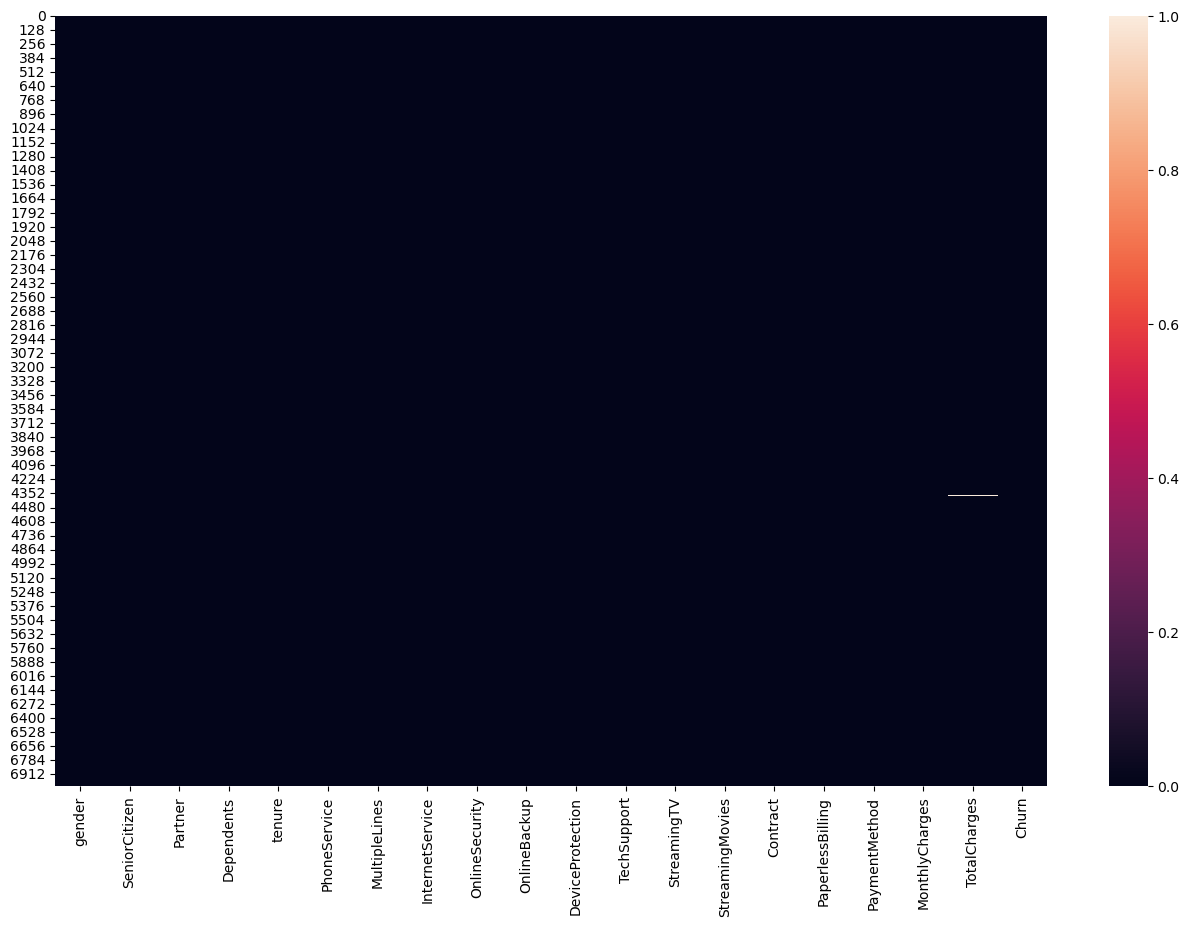

In [23]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [24]:
#Finding the percentage of data missing from the dataset
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
df_null=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null.sort_values(by=["% Missing data"],ascending=False)

Missing Values


Data Type  Missing Values  % Missing data
TotalCharges       float64              11             0.2
gender              object               0             0.0
SeniorCitizen        int64               0             0.0
MonthlyCharges     float64               0             0.0
PaymentMethod       object               0             0.0
PaperlessBilling    object               0             0.0
Contract            object               0             0.0
StreamingMovies     object               0             0.0
StreamingTV         object               0             0.0
TechSupport         object               0             0.0
DeviceProtection    object               0             0.0
OnlineBackup        object               0             0.0
OnlineSecurity      object               0             0.0
InternetService     object               0             0.0
MultipleLines       object               0             0.0
PhoneService        object               0             0.0
tenure               int64               0             0.0
Dependents          object               0             0.0
Partner             object               0             0.0
Churn               object               0             0.0

#### Observation:
- **Null values are present in 'TotalCharges' column. As the data is continues in nature, I will use 'median' or 'mode' to replace null values.**

In [25]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.353388017122
Median of TotalCharges: 1403.875


- **As Mean > Median, the data is right skewed**

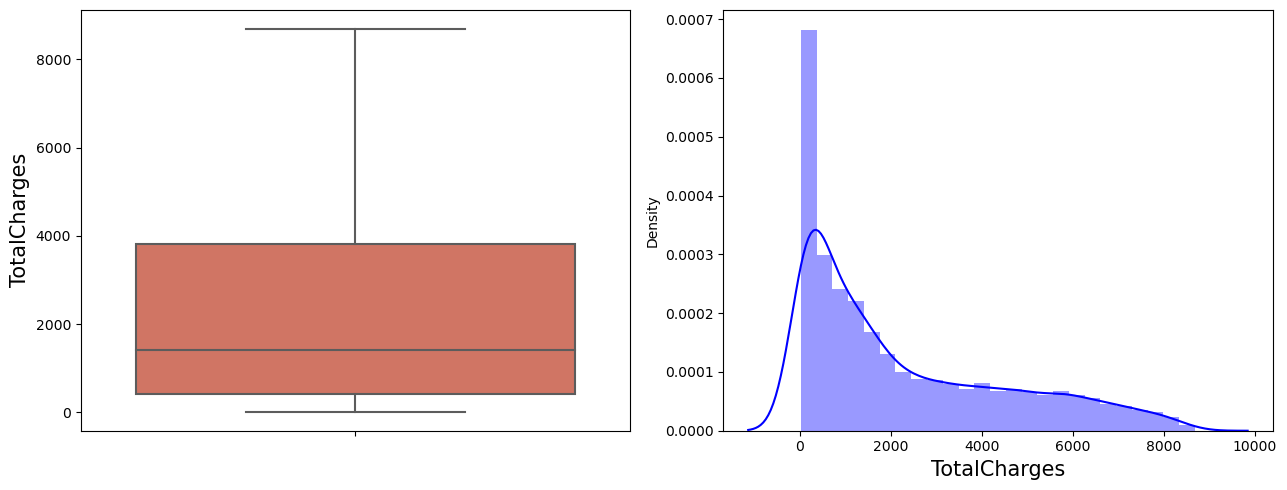

In [26]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df)
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

### Observations:
- **we can see the plot is right skewed as mean is greater than median**
- **If the data is normally distributed with no outliers, using the mean to impute missing values is a reasonable approach.
However, if the data is skewed or contains outliers, it is better to use the median to impute missing values**

In [27]:
# Segregating colums with null values based on the datatype
df_null_num=['TotalCharges']

In [28]:
# Using Simple Imputer by filling null values of columns with 'median' 
for i in df_null_num:
    if (df[i].dtype=='float64' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].median())

print(df.isnull().sum().sum())

0


#### Observations:
- **No null values in the dataframe after imputation**

In [29]:
df.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85         29.85    No  
1               No      Mailed check           56.95       1889.50    No  
2              Yes      Mailed check           53.85        108.15   Yes

# Segregating columns based on data type for better EDA

In [30]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [31]:
df_int_cat=['SeniorCitizen'] # categorical data with numeric values
df_int_nocat=['tenure','MonthlyCharges', 'TotalCharges'] # numeric data

In [32]:
#Object data (categorical data with string values)
df_cat_str=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [33]:
df_numerical=['tenure','MonthlyCharges', 'TotalCharges']
df_categorical=['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [34]:
df_numerical=df[df_numerical]
df_categorical=df[df_categorical]

# Statistical Summary:

In [35]:
# Statistical summary for numerical data
df_numerical.describe().T

count         mean          std    min     25%       50%  \
tenure          7021.0    32.469449    24.534965   0.00    9.00    29.000   
MonthlyCharges  7021.0    64.851894    30.069001  18.25   35.75    70.400   
TotalCharges    7021.0  2288.964517  2265.315517  18.80  411.15  1403.875   

                   75%      max  
tenure            55.0    72.00  
MonthlyCharges    89.9   118.75  
TotalCharges    3801.7  8684.80

#### Observation:
- **count is same for all the features.Hence,no null values are present.**
- **minimum monthly charges are 18.25 and max is 118.75**
- **Total charges vary from 18.80 to 8684.80**
- **large difference between 75% and max shows presence of outliers**

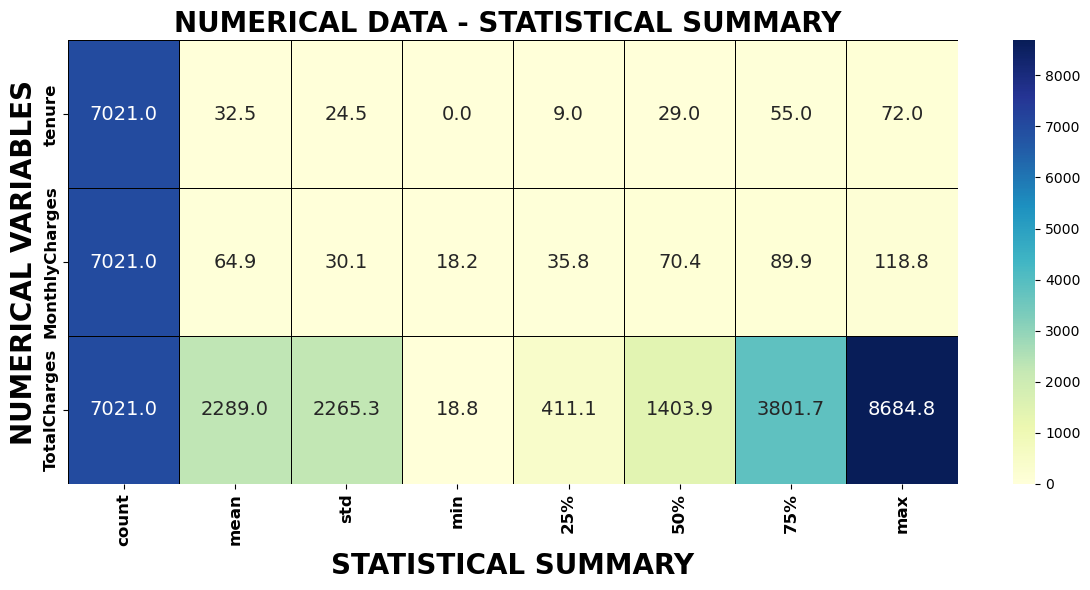

In [36]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(12,6))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

In [37]:
# Statistical summary for object data type
df_categorical.describe(include='O').T

count unique               top  freq
gender            7021      2              Male  3541
Partner           7021      2                No  3619
Dependents        7021      2                No  4911
PhoneService      7021      2               Yes  6339
MultipleLines     7021      3                No  3368
InternetService   7021      3       Fiber optic  3090
OnlineSecurity    7021      3                No  3490
OnlineBackup      7021      3                No  3080
DeviceProtection  7021      3                No  3087
TechSupport       7021      3                No  3465
StreamingTV       7021      3                No  2802
StreamingMovies   7021      3                No  2777
Contract          7021      3    Month-to-month  3853
PaperlessBilling  7021      2               Yes  4161
PaymentMethod     7021      4  Electronic check  2359
Churn             7021      2                No  5164

#### Observation:
- **count is same for all the categorical features.Hence no null values are present**
- **Most of the customers are using payment method as electronic check with paperlessbilling**
- **most of the customers donot have online security,online backup,deviceprotection,tech support streaming tv and streaming movies**

# Visualization of data

### Univariate Graphical Analysis for Categorical data

In [38]:
len(df_cat_str)

16

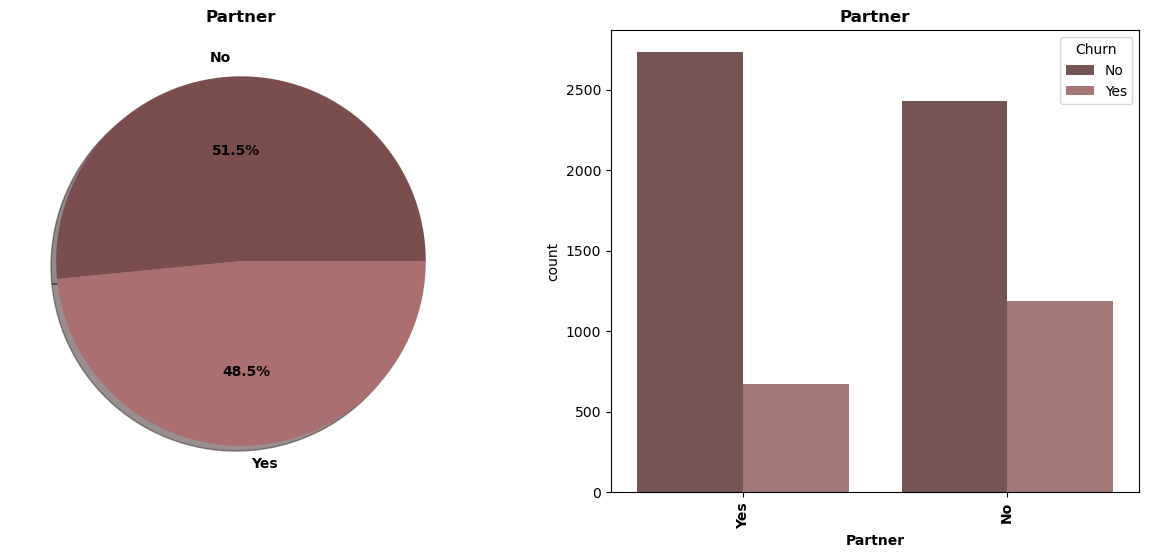

Observations for feature PARTNER:


Value  Count  % Count
0    No   3619     51.5
1   Yes   3402     48.5

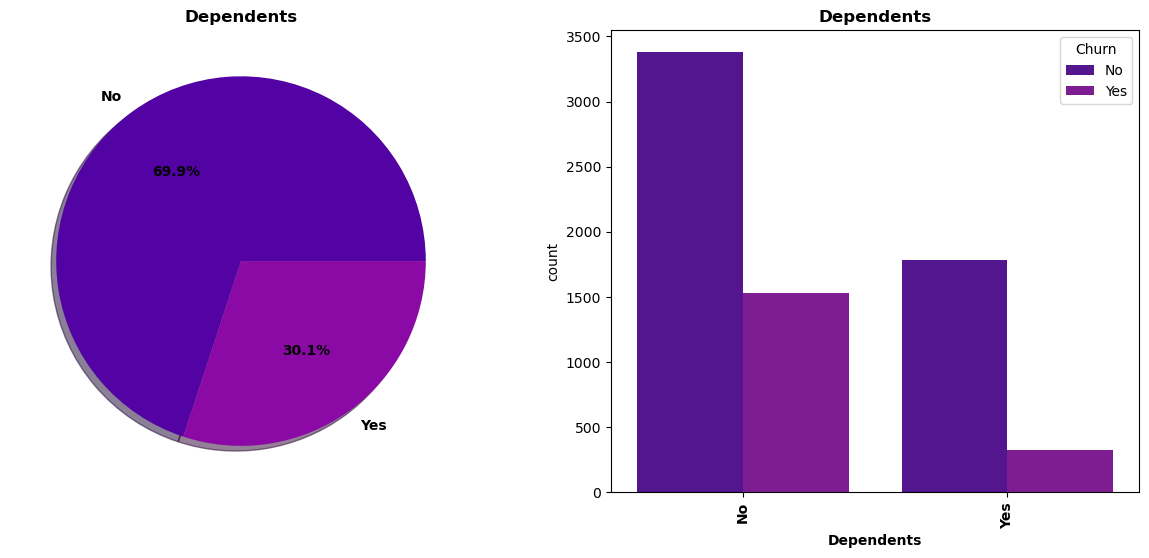

Observations for feature DEPENDENTS:


Value  Count  % Count
0    No   4911     69.9
1   Yes   2110     30.1

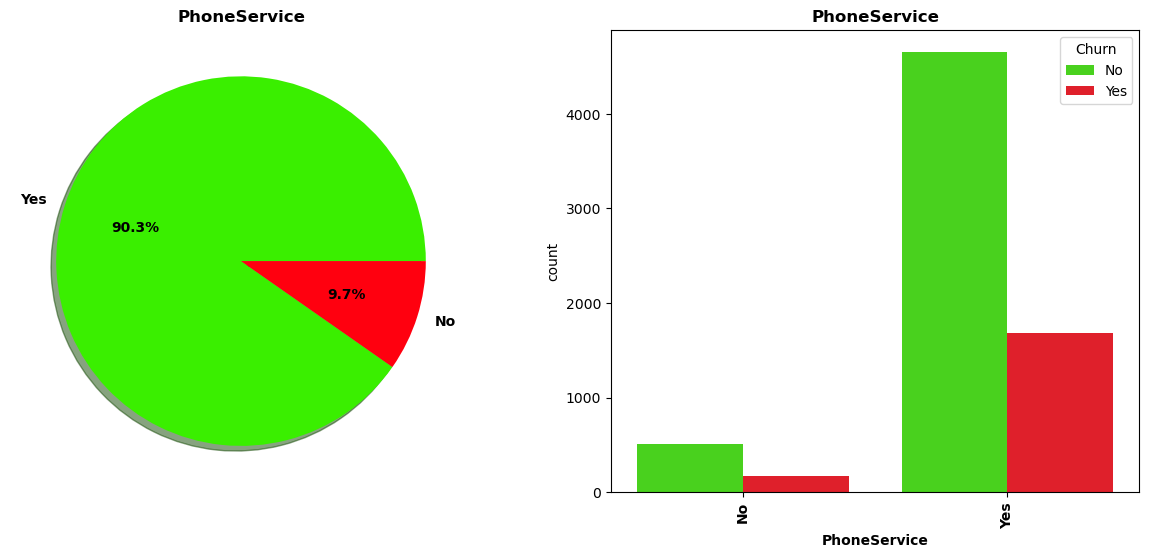

Observations for feature PHONESERVICE:


Value  Count  % Count
0   Yes   6339     90.3
1    No    682      9.7

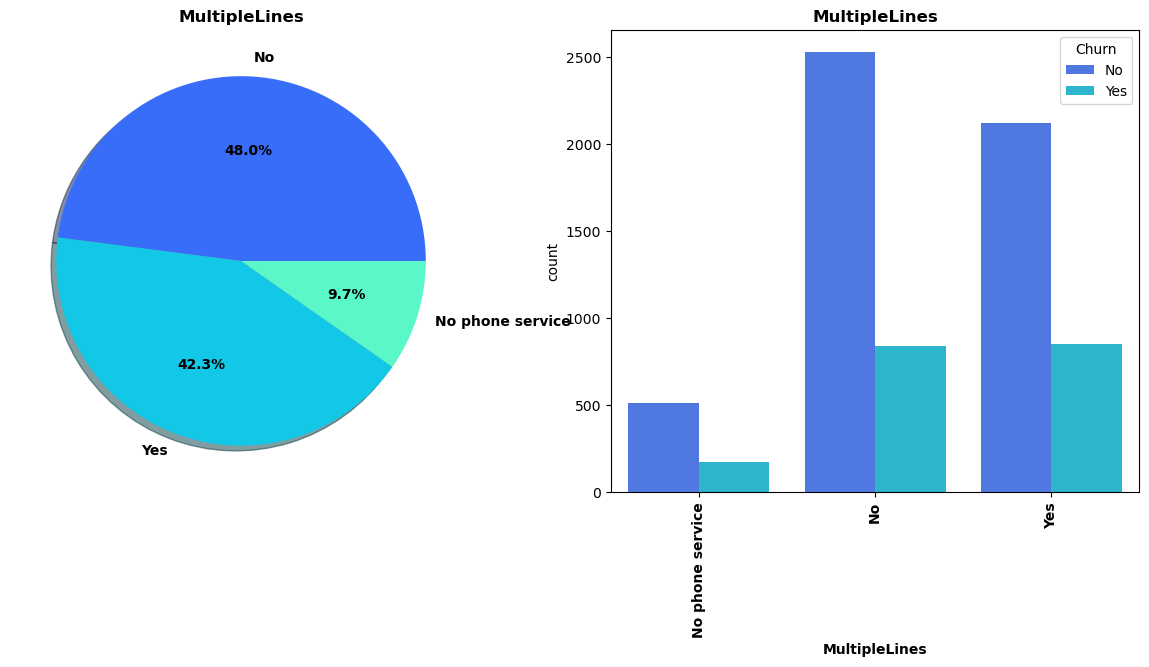

Observations for feature MULTIPLELINES:


Value  Count  % Count
0                No   3368     48.0
1               Yes   2971     42.3
2  No phone service    682      9.7

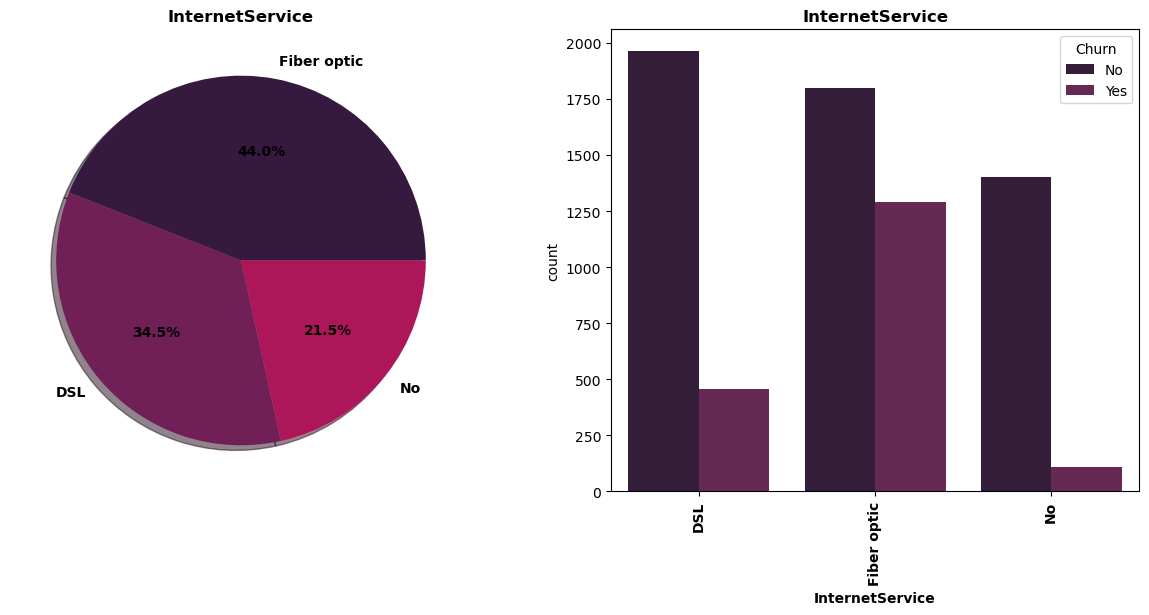

Observations for feature INTERNETSERVICE:


Value  Count  % Count
0  Fiber optic   3090     44.0
1          DSL   2419     34.5
2           No   1512     21.5

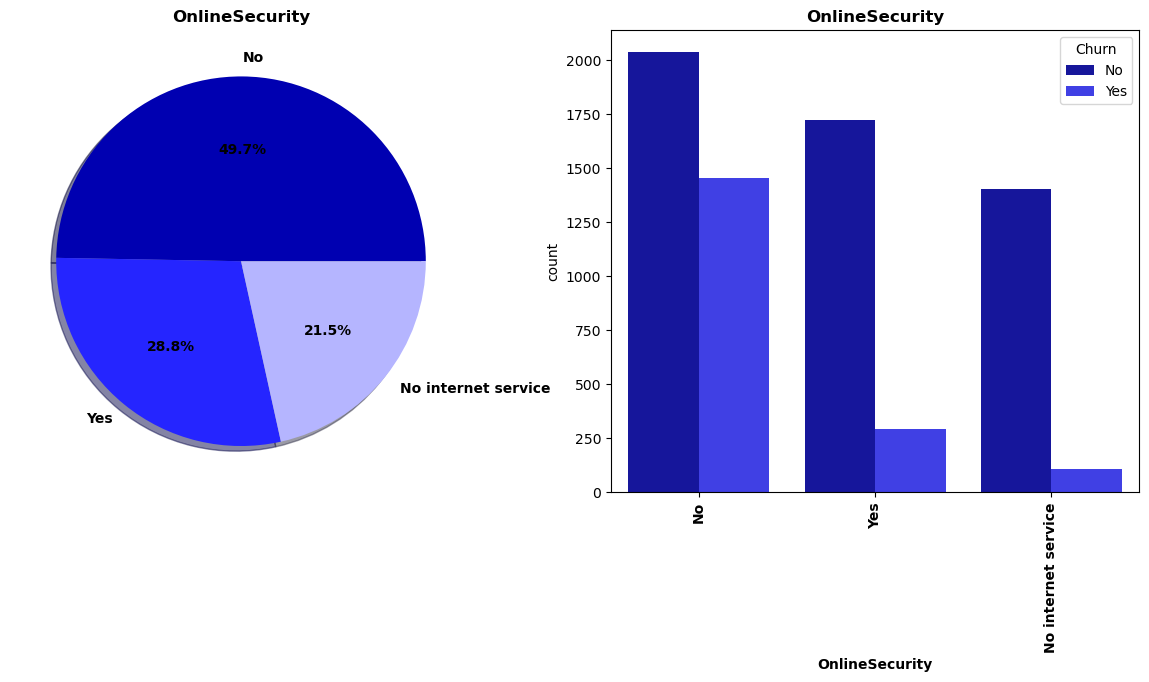

Observations for feature ONLINESECURITY:


Value  Count  % Count
0                   No   3490     49.7
1                  Yes   2019     28.8
2  No internet service   1512     21.5

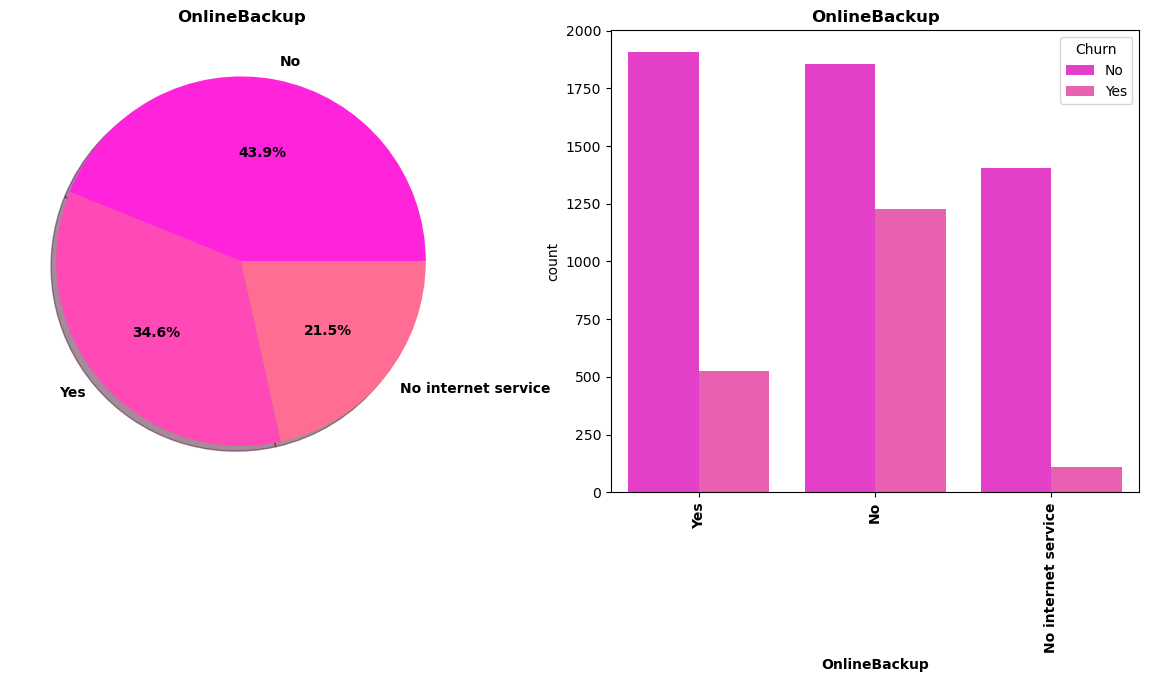

Observations for feature ONLINEBACKUP:


Value  Count  % Count
0                   No   3080     43.9
1                  Yes   2429     34.6
2  No internet service   1512     21.5

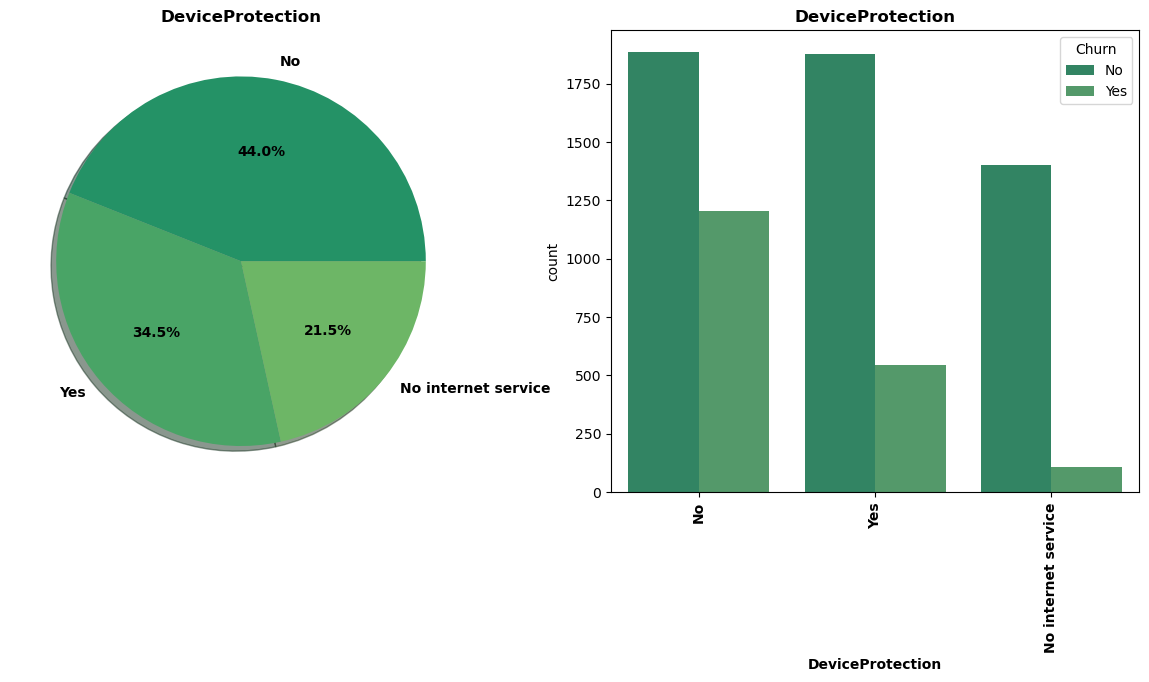

Observations for feature DEVICEPROTECTION:


Value  Count  % Count
0                   No   3087     44.0
1                  Yes   2422     34.5
2  No internet service   1512     21.5

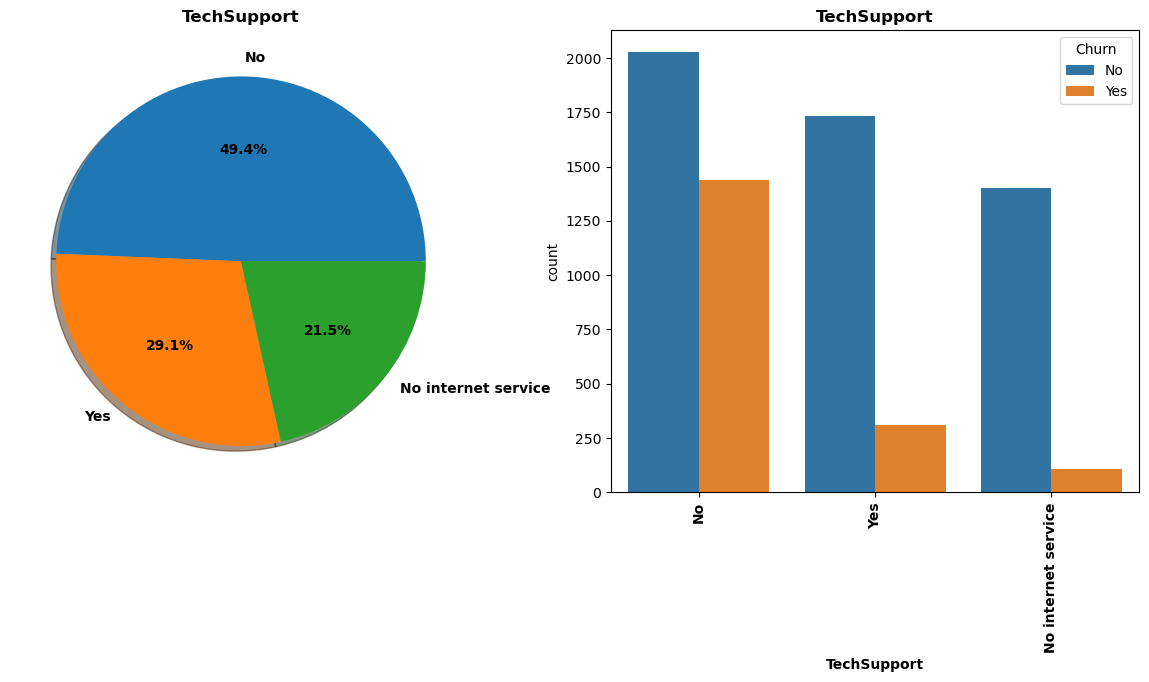

Observations for feature TECHSUPPORT:


Value  Count  % Count
0                   No   3465     49.4
1                  Yes   2044     29.1
2  No internet service   1512     21.5

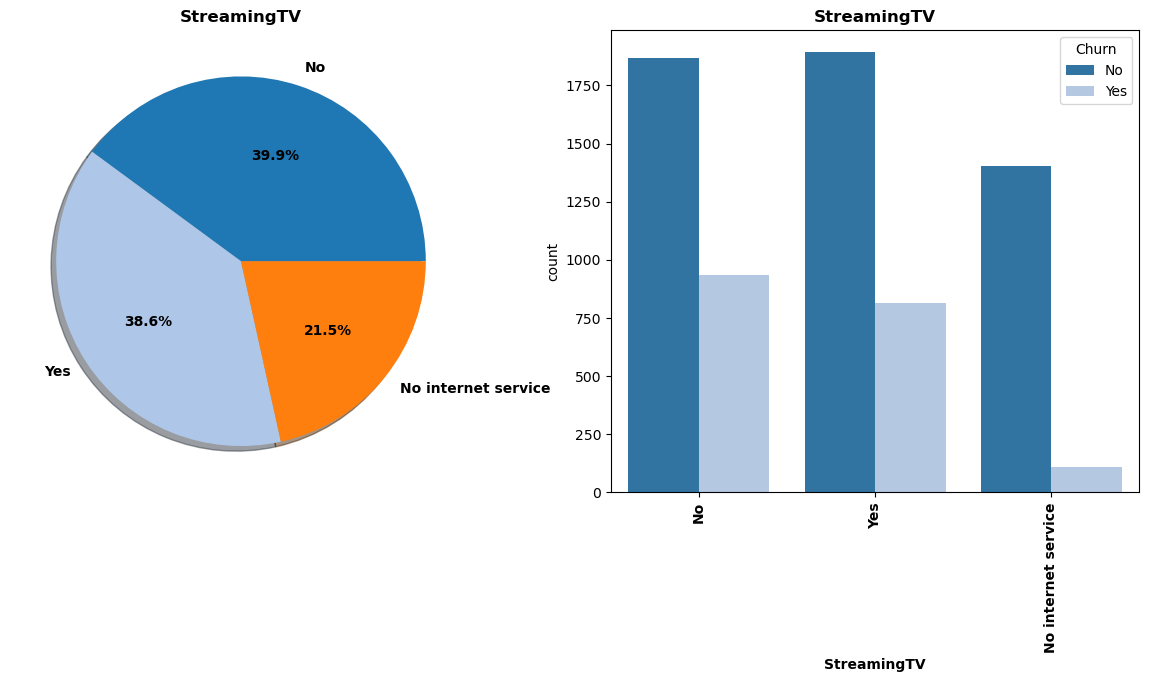

Observations for feature STREAMINGTV:


Value  Count  % Count
0                   No   2802     39.9
1                  Yes   2707     38.6
2  No internet service   1512     21.5

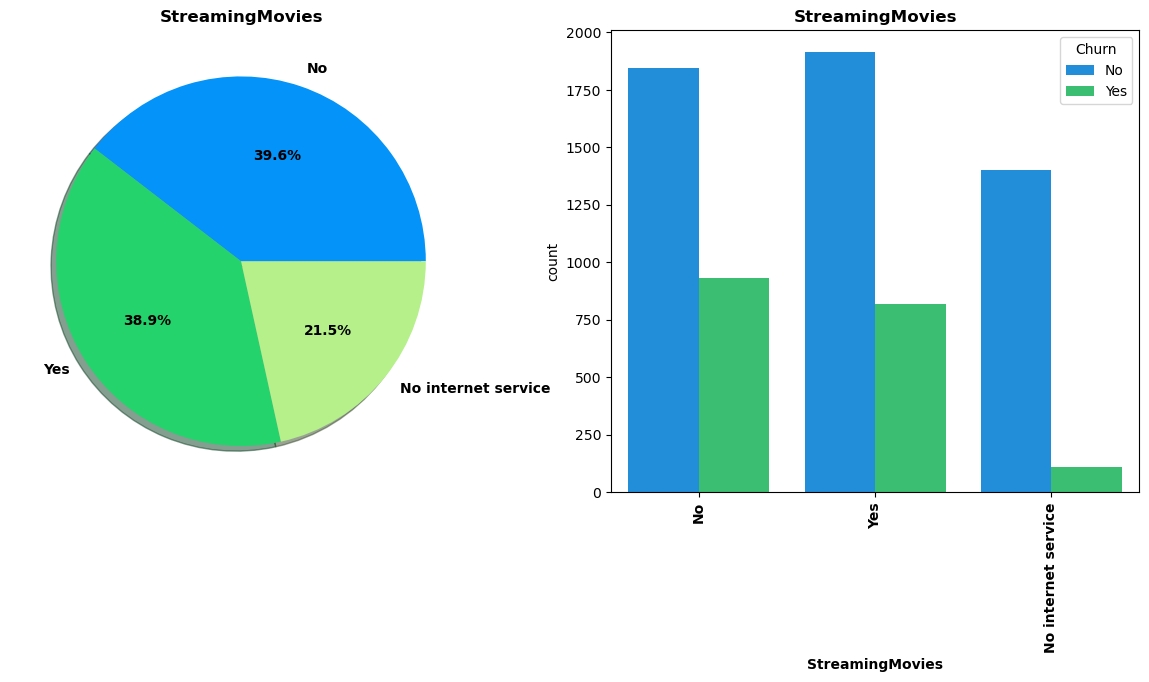

Observations for feature STREAMINGMOVIES:


Value  Count  % Count
0                   No   2777     39.6
1                  Yes   2732     38.9
2  No internet service   1512     21.5

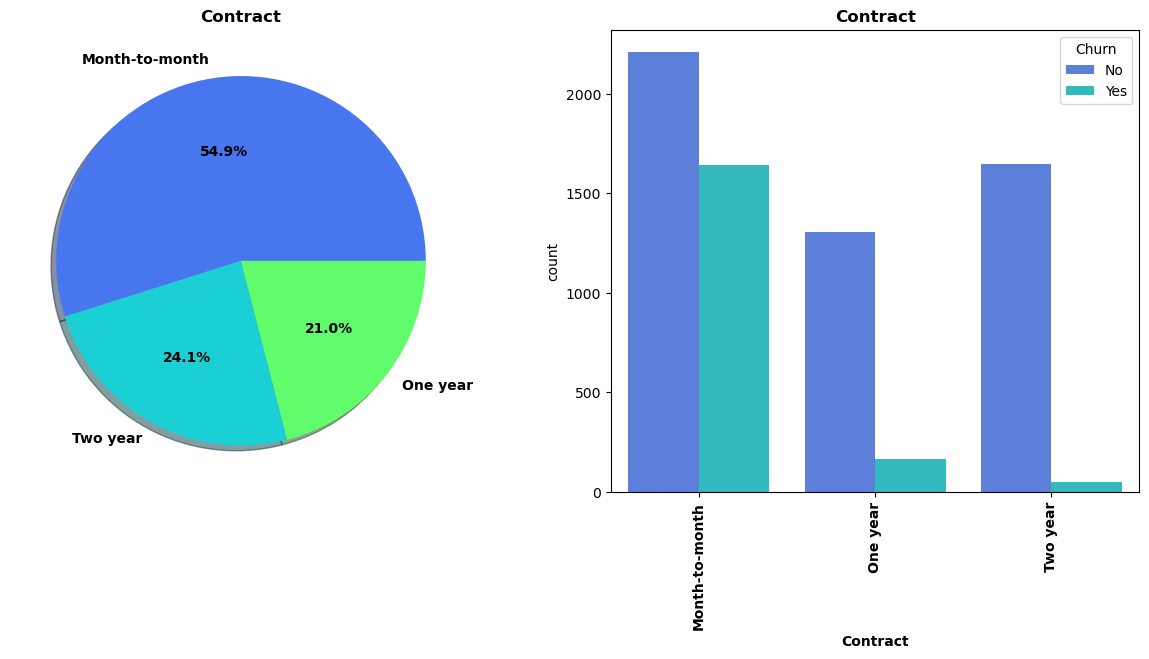

Observations for feature CONTRACT:


Value  Count  % Count
0  Month-to-month   3853     54.9
1        Two year   1695     24.1
2        One year   1473     21.0

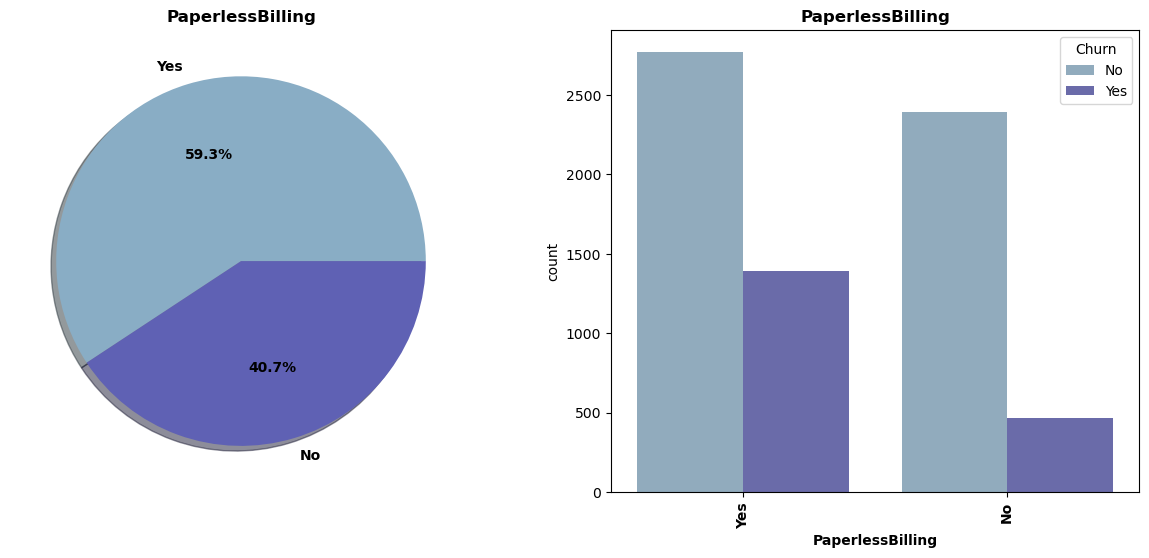

Observations for feature PAPERLESSBILLING:


Value  Count  % Count
0   Yes   4161     59.3
1    No   2860     40.7

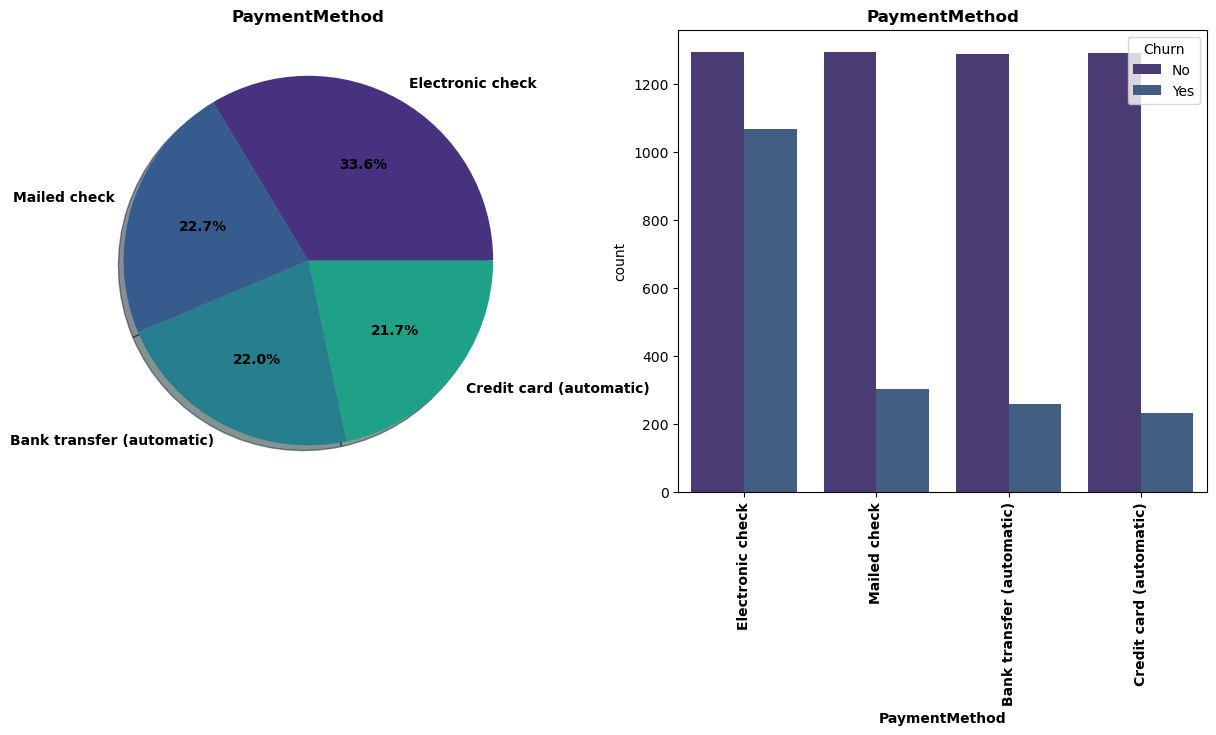

Observations for feature PAYMENTMETHOD:


Value  Count  % Count
0           Electronic check   2359     33.6
1               Mailed check   1596     22.7
2  Bank transfer (automatic)   1544     22.0
3    Credit card (automatic)   1522     21.7

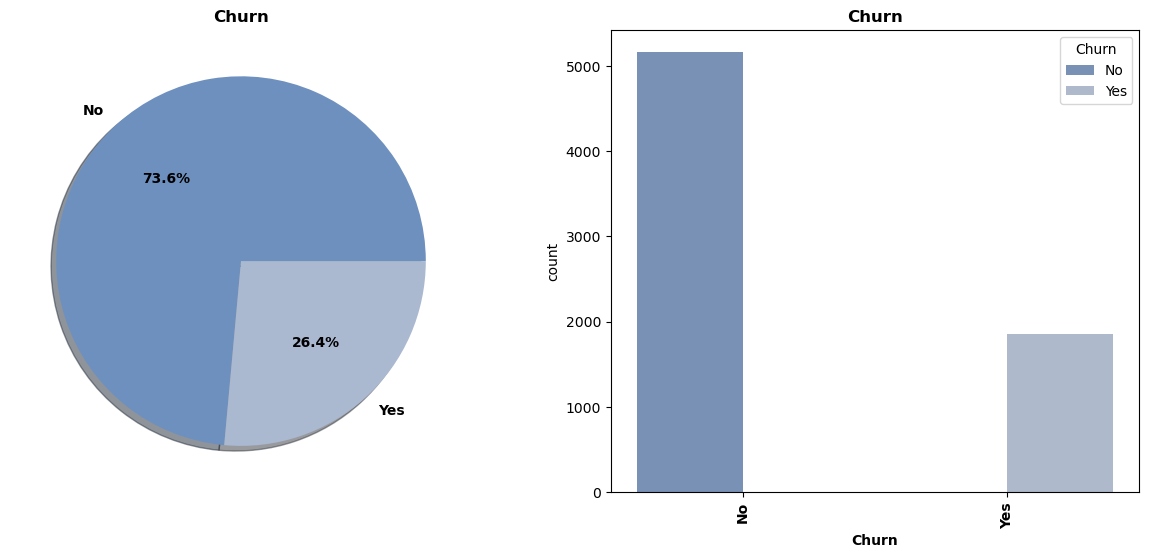

Observations for feature CHURN:


Value  Count  % Count
0    No   5164     73.6
1   Yes   1857     26.4

In [39]:
colors=['pink', 'plasma','prism', 'rainbow', 'rocket', 
        'seismic', 'spring','summer', 'tab10', 'tab20','terrain', 'turbo', 'twilight','viridis', 'vlag', 'winter']
plotnumber =1
for i in df_cat_str[1:]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,2,figsize=(15,6))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],hue=df["Churn"],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

#### Observation:
- **most customers have phoneservice.if the customer is dissatisfied with the quality of their phone service, such as dropped calls or poor sound quality, they may be more likely to churn**
- **44% of customers opted for fiber optic internet service.Next comes DSL.**
- **More customers with online security like antivirus software, firewall protection etc.,**
- **less number of customers with online backup**
- **only 34.5% of people have device protection.44% customers are without device protection**
- **we can see more churn when people are not getting good techsupport and viceversa**
- **More amount of churn when the contract is for month to month.less churn when the contract is more than a year**
- **overall coustomer churn is less in number**

### Univariate Graphical Analysis for Categorical data - Int Data Type

In [40]:
df_int_cat=['SeniorCitizen']

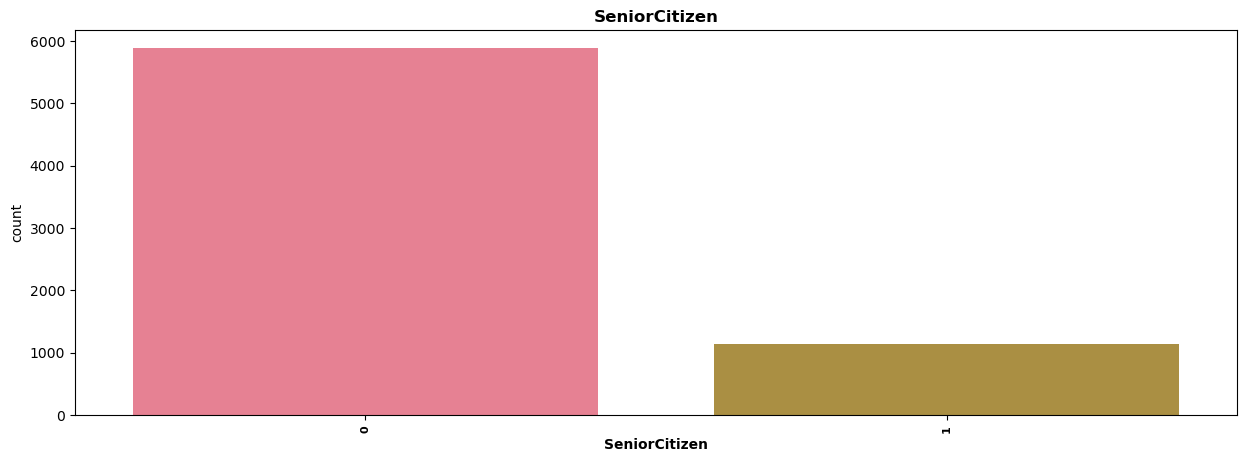

Observations for feature SENIORCITIZEN:


Value  Count  % Count
0      0   5880     83.7
1      1   1141     16.3

In [41]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket']
plotnumber =1
for i in df_int_cat:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,1,figsize=(15,5))
        sns.countplot(df[i],data=df)
        ax.set_title(i,fontsize=12,fontweight ='bold')
        ax.set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts()).iloc[j])
        percent_value_count.append(round(((df[i].value_counts()).iloc[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

#### Observation:
- **most of our customers in the data are younger people.**

### Univariate Graphical Analysis for Numerical data

In [42]:
len(df_numerical.columns)

3

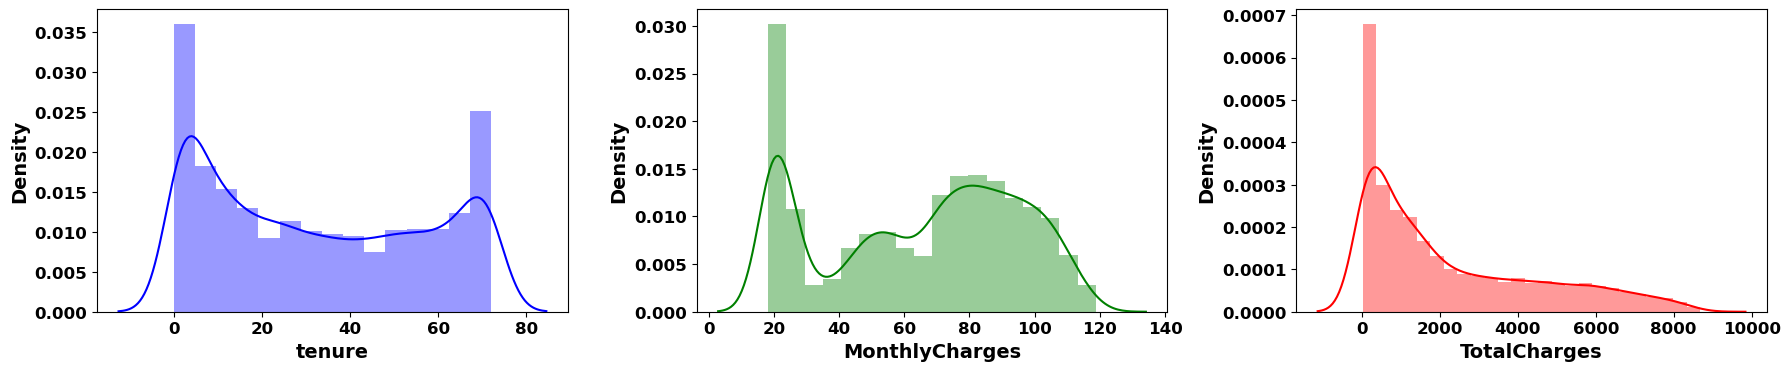

In [43]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,3,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observation:
- **minimum and maximum tenure varies from 0 to around 75**
- **we can see the spread of data is more for all the three features tenure,monthlycharges and total charges**

### Bivariate Graphical Analysis for Categorical data - Int Data Type

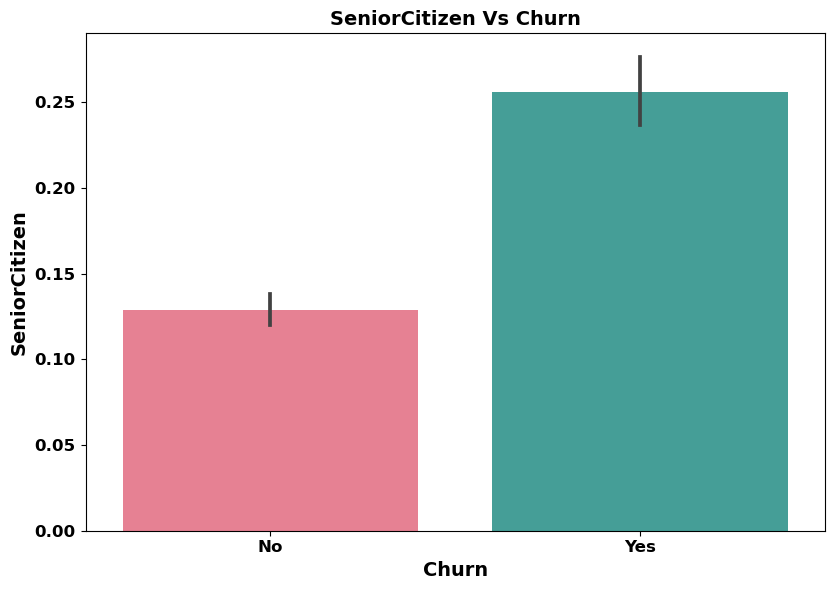

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df['Churn'],df[df_int_cat[0]], palette = 'husl')
plt.title('{} Vs Churn'.format(df_int_cat[0]),fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=14,fontweight='bold')
plt.ylabel(df_int_cat[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()


#### Observation:
- **There are few number of customers who are senior citizens. Thus most of our customers in the data are younger people.**

### Bivariate Graphical Analysis for Numerical data

In [45]:
df_numerical.shape

(7021, 3)

In [46]:
df_num=df_numerical.columns
df_num

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

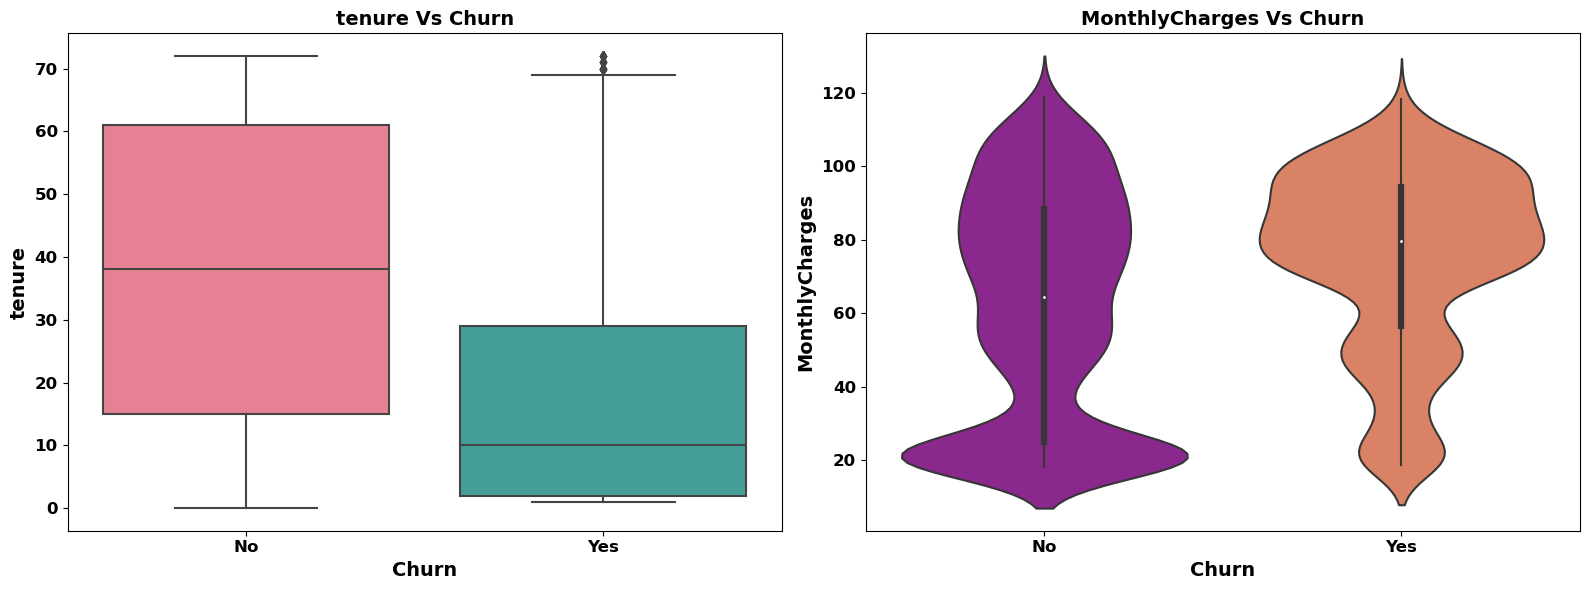

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Churn'],df[df_num[0]], palette = 'husl')
plt.title('{} Vs Churn'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=14,fontweight='bold')
plt.ylabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df['Churn'],df[df_num[1]], palette = 'plasma')
plt.title('{} Vs Churn'.format(df_num[1]),fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=14,fontweight='bold')
plt.ylabel(df_num[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **customers who have been with a company for a longer period of time are less likely to churn**
- **when monthly charges are less,then we can see less amount of churn**

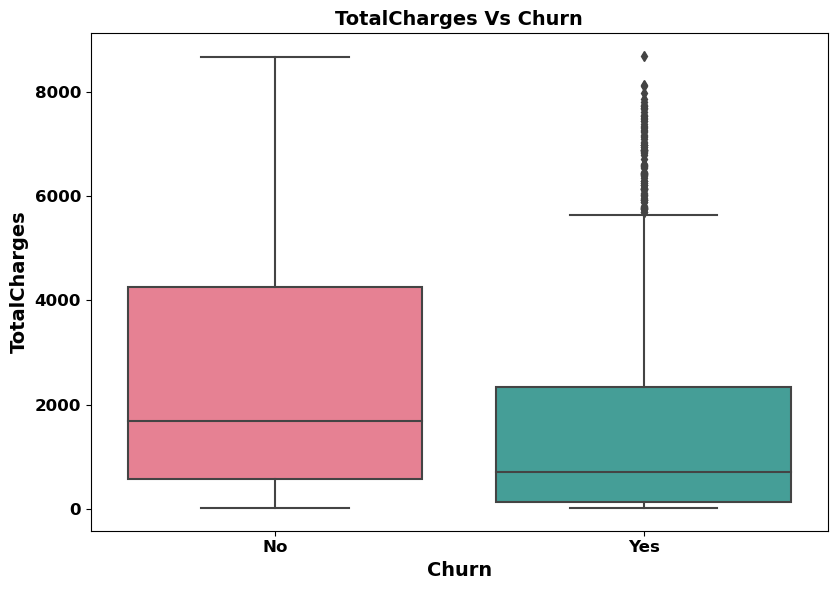

In [48]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['Churn'],df[df_num[2]], palette = 'husl')
plt.title('{} Vs Churn'.format(df_num[2]),fontsize=14, fontweight='bold')
plt.xlabel('Churn', fontsize=14,fontweight='bold')
plt.ylabel(df_num[2], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()

#### Observation:
- **customers who are satisfied with the services they receive from a company are more likely to pay their bills in full and on time, resulting in higher total charges.**
- **Here total charges are more shows less churn**

### Multivariate Graphical Analysis

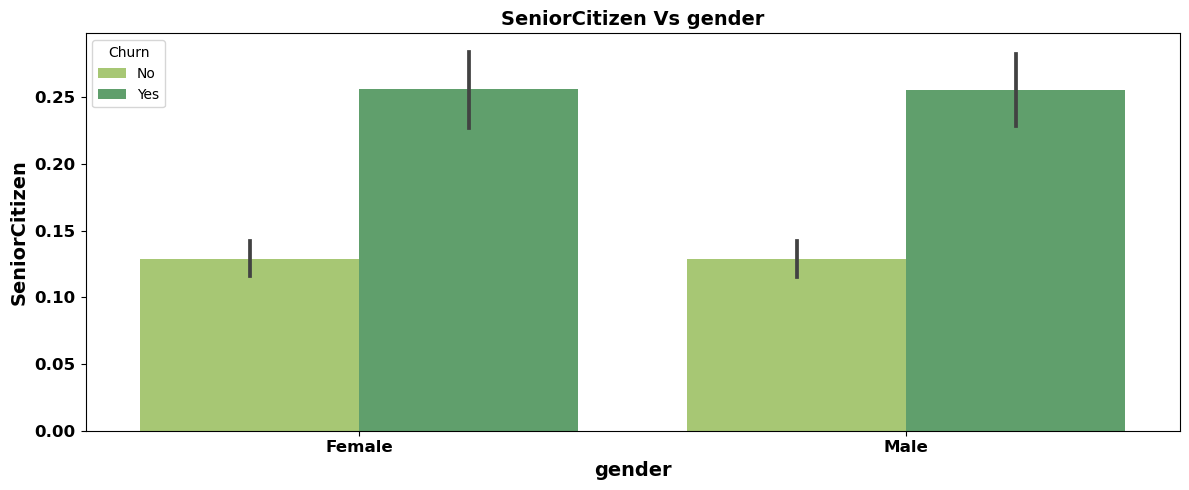

In [49]:
plt.figure(figsize=(12,5))
sns.barplot(y='SeniorCitizen',x='gender',data=df,hue='Churn', palette='summer_r')
plt.title("SeniorCitizen Vs gender",fontsize=14, fontweight='bold')
plt.ylabel('SeniorCitizen', fontsize=14,fontweight='bold')
plt.xlabel('gender', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **churn is more in case of seniorcitizen**

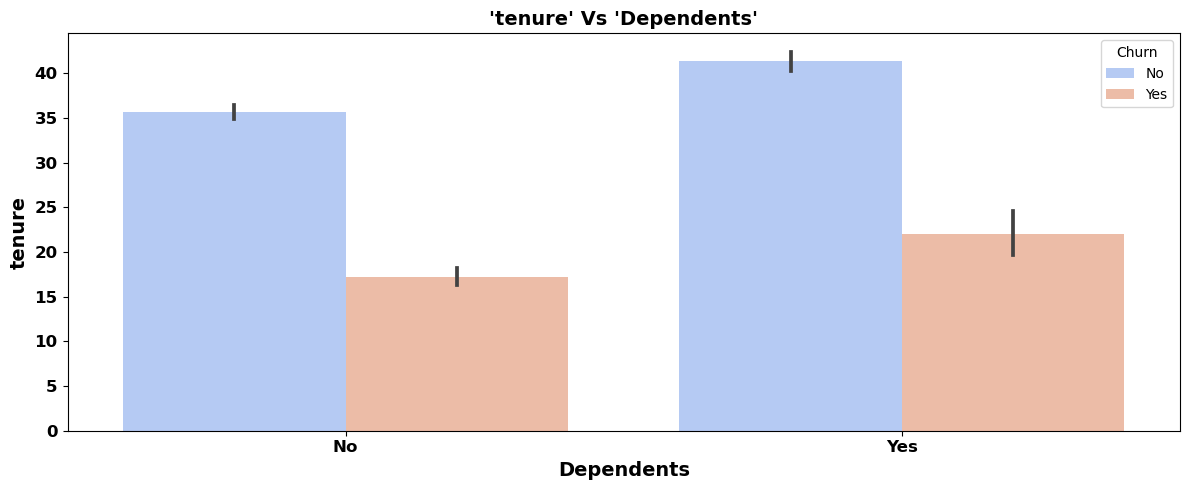

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(y='tenure',x='Dependents',data=df,hue='Churn', palette='coolwarm')
plt.title("'tenure' Vs 'Dependents'",fontsize=14, fontweight='bold')
plt.ylabel('tenure', fontsize=14,fontweight='bold')
plt.xlabel('Dependents', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

- **Almost many Customer have dependents on them and they also have less tendency to churn**

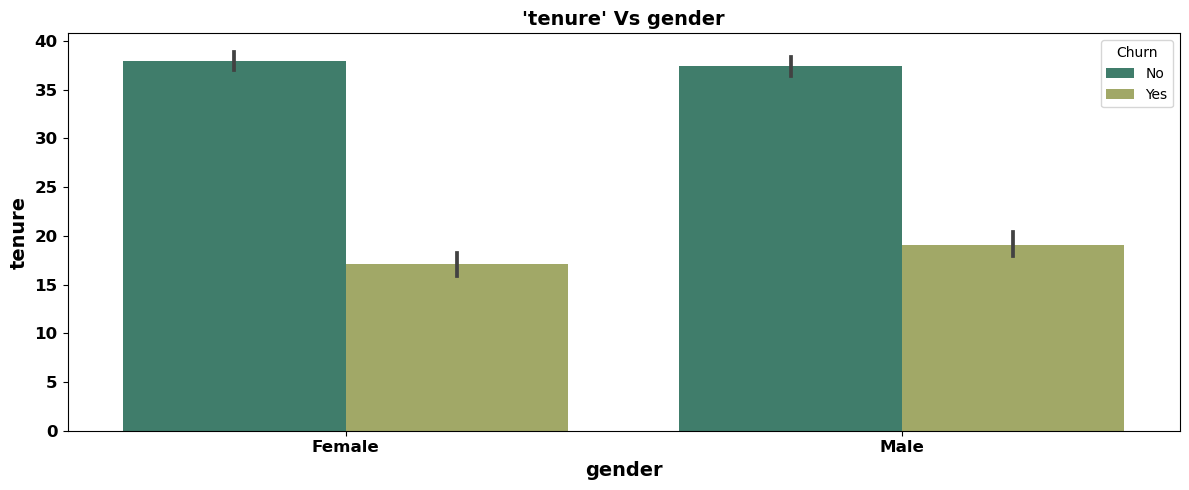

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(y='tenure',x='gender',data=df,hue='Churn', palette='gist_earth')
plt.title("'tenure' Vs gender",fontsize=14, fontweight='bold')
plt.ylabel('tenure', fontsize=14,fontweight='bold')
plt.xlabel('gender', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### ObservationL:
- **we can see the customers who have been with a company for a longer period of time are less likely to churn**

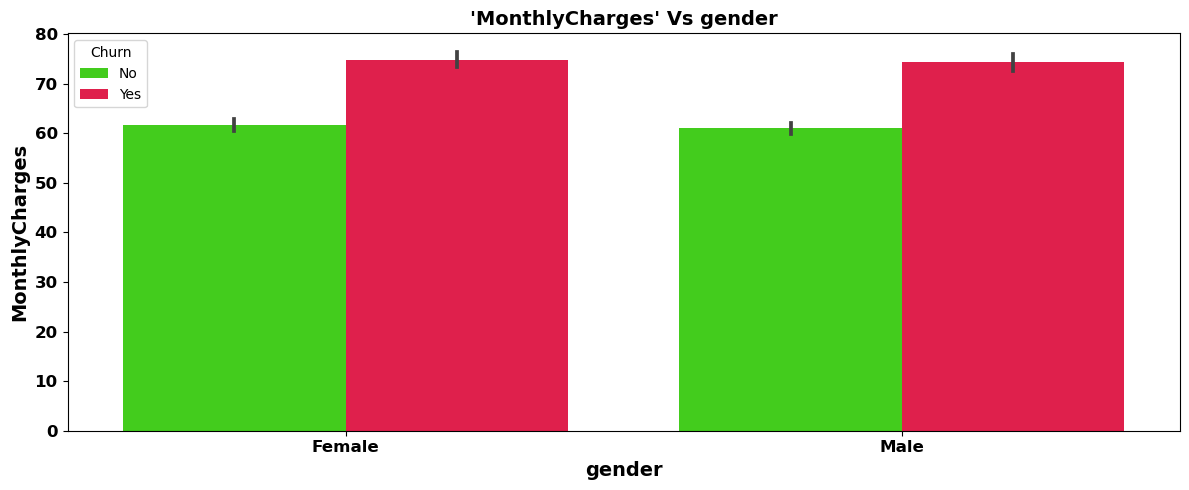

In [52]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='gender',data=df,hue='Churn', palette='prism')
plt.title("'MonthlyCharges' Vs gender",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('gender', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **When monthly charges are more then its more likely to have churn**

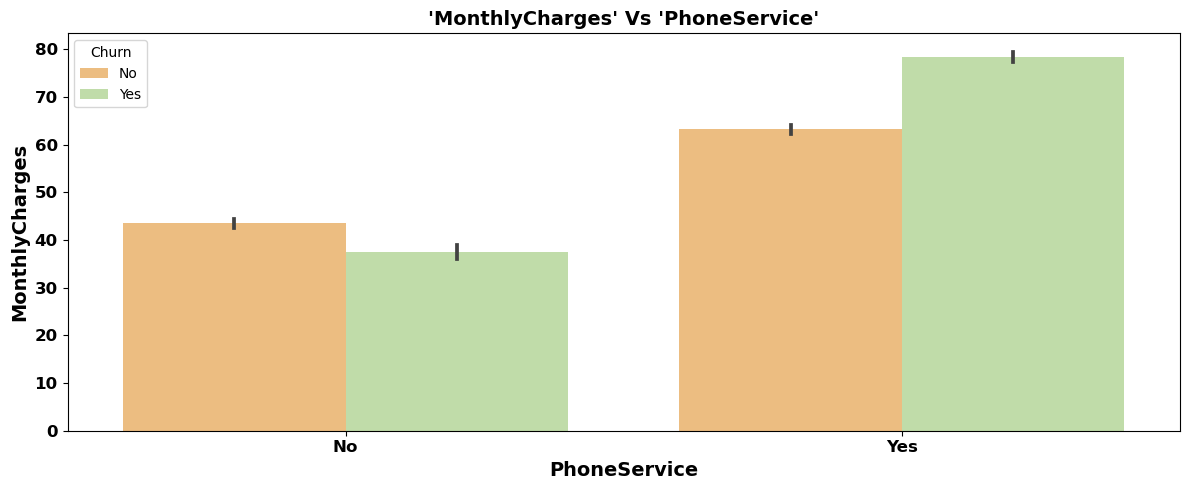

In [53]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='PhoneService',data=df,hue='Churn', palette='Spectral')
plt.title("'MonthlyCharges' Vs 'PhoneService'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('PhoneService', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **customers with phoneservice and more monthly charges are more likely to have churn**

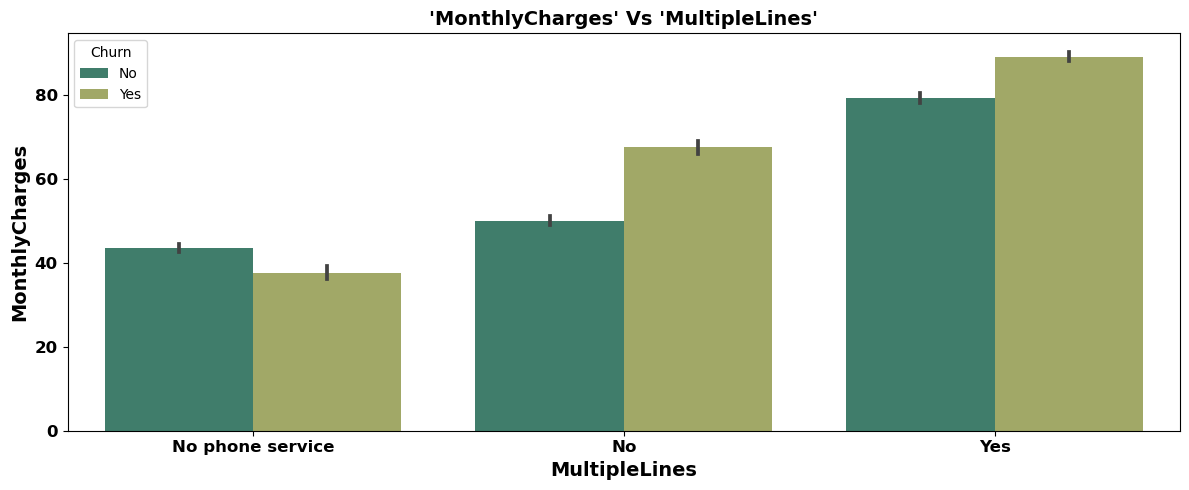

In [54]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='MultipleLines',data=df,hue='Churn', palette='gist_earth')
plt.title("'MonthlyCharges' Vs 'MultipleLines'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('MultipleLines', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **more the monthly charges with multiple lines,more is the churn**
- **monthly charges are more with multiple lines and viceversa**

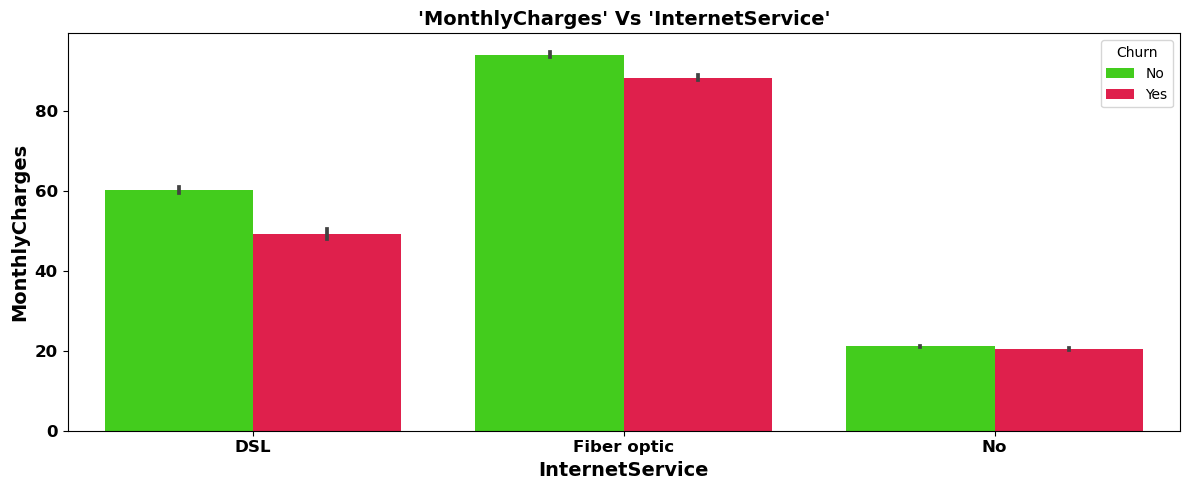

In [55]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='InternetService',data=df,hue='Churn', palette='prism')
plt.title("'MonthlyCharges' Vs 'InternetService'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('InternetService', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Most of the people opted for fiber optic internet service which have more monthly charges when compared to DSL**

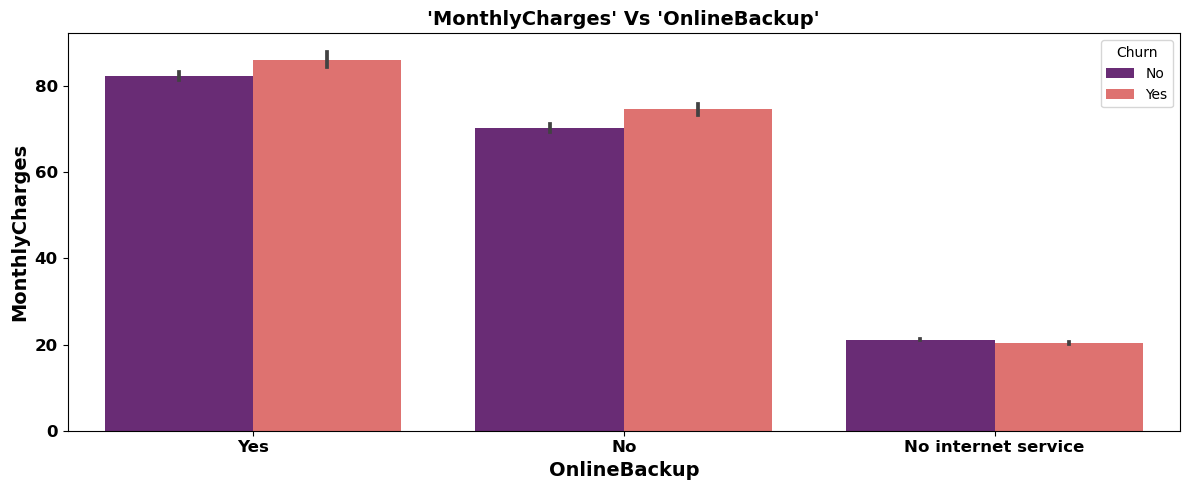

In [56]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='OnlineBackup',data=df,hue='Churn', palette='magma')
plt.title("'MonthlyCharges' Vs 'OnlineBackup'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('OnlineBackup', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **customers with onlinebackup are more with churn** 

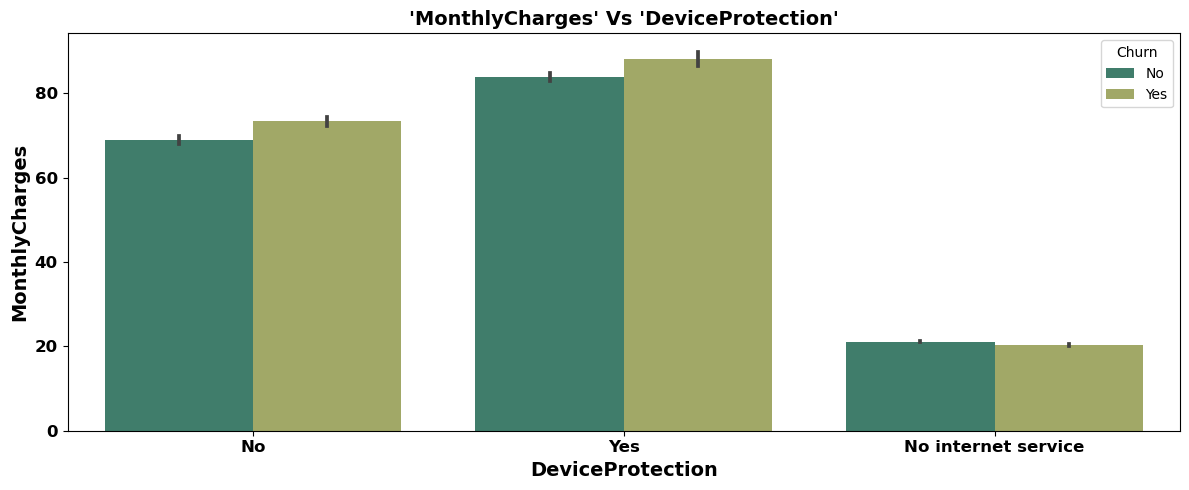

In [57]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='DeviceProtection',data=df,hue='Churn', palette='gist_earth')
plt.title("'MonthlyCharges' Vs 'DeviceProtection'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('DeviceProtection', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **monthly charges are more for customers with deviceprotection like repair or replacement options etc.,with more churn**

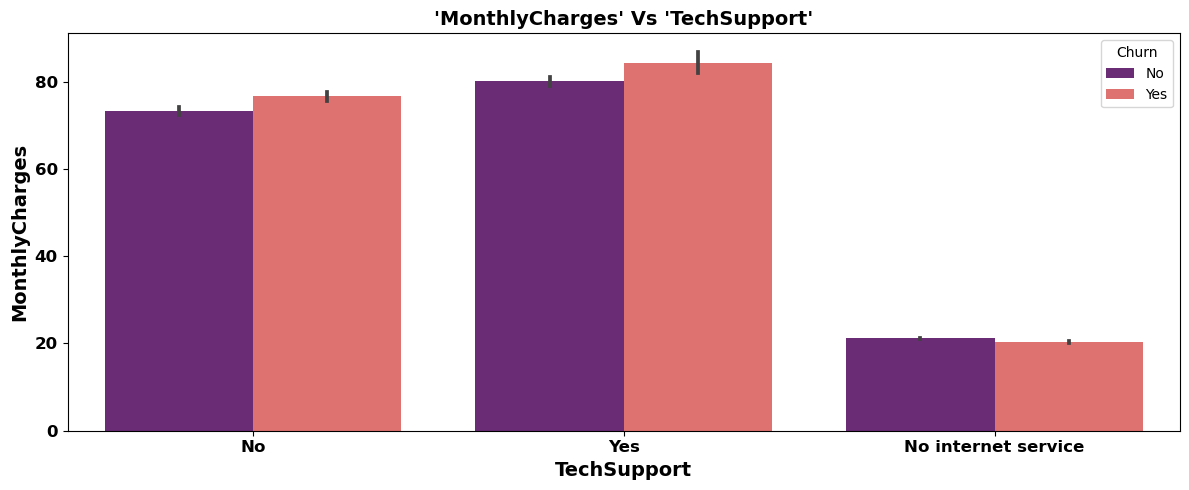

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='TechSupport',data=df,hue='Churn', palette='magma')
plt.title("'MonthlyCharges' Vs 'TechSupport'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('TechSupport', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **customers who experience frequent technical issues may be more likely to dispute charges or request refunds, resulting in lower monthly charges. However, if their technical issues are not resolved to their satisfaction, they may still choose to churn.**

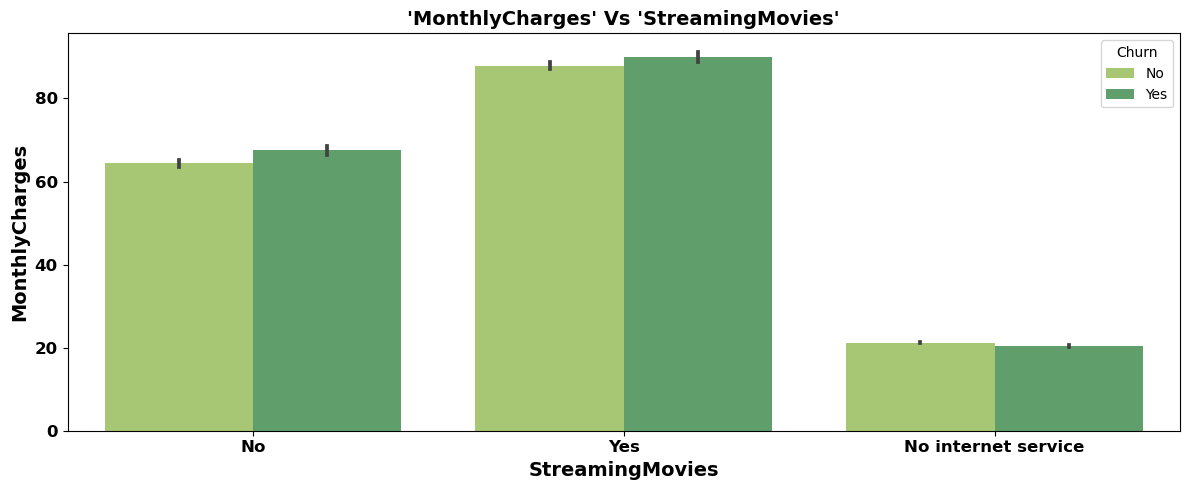

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='StreamingMovies',data=df,hue='Churn', palette='summer_r')
plt.title("'MonthlyCharges' Vs 'StreamingMovies'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('StreamingMovies', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

- **customers who subscribe to StreamingMovies may be more likely to churn if they experience technical issues or poor service quality.**

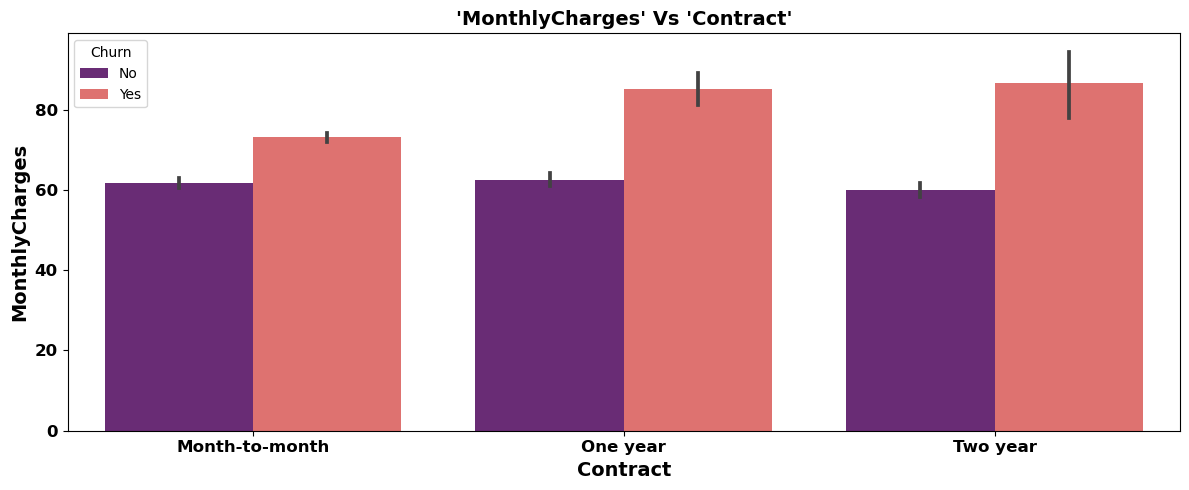

In [60]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='Contract',data=df,hue='Churn', palette='magma')
plt.title("'MonthlyCharges' Vs 'Contract'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('Contract', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Customers who are on a long-term contract with a company with more monthly price may be likely to churn compared to those who are on less monthly plan**

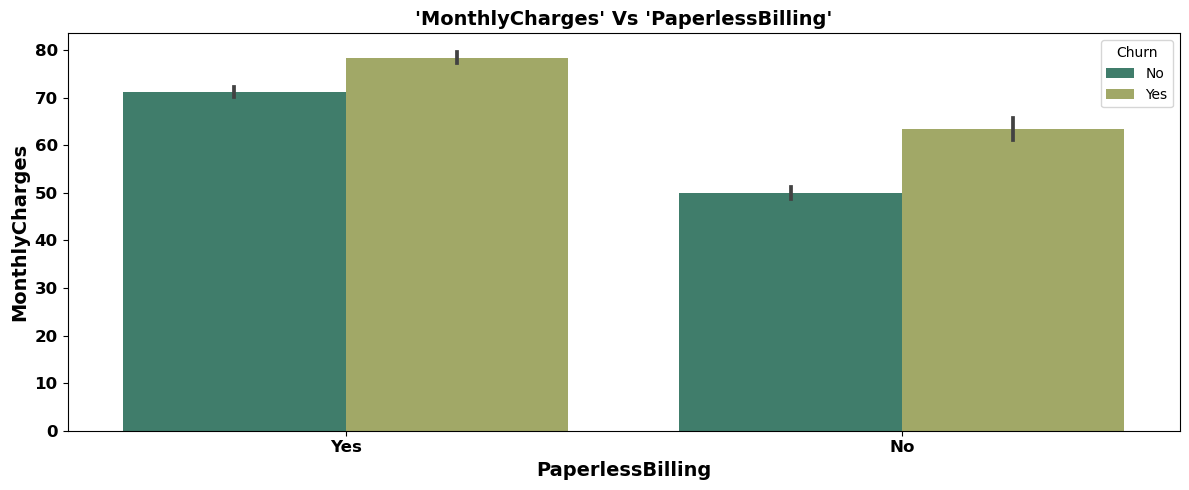

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='PaperlessBilling',data=df,hue='Churn', palette='gist_earth')
plt.title("'MonthlyCharges' Vs 'PaperlessBilling'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('PaperlessBilling', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Customers who opt for paperless billing may be more likely to churn if they experience technical issues or poor service quality that affect their ability to access and manage their billing information online.**

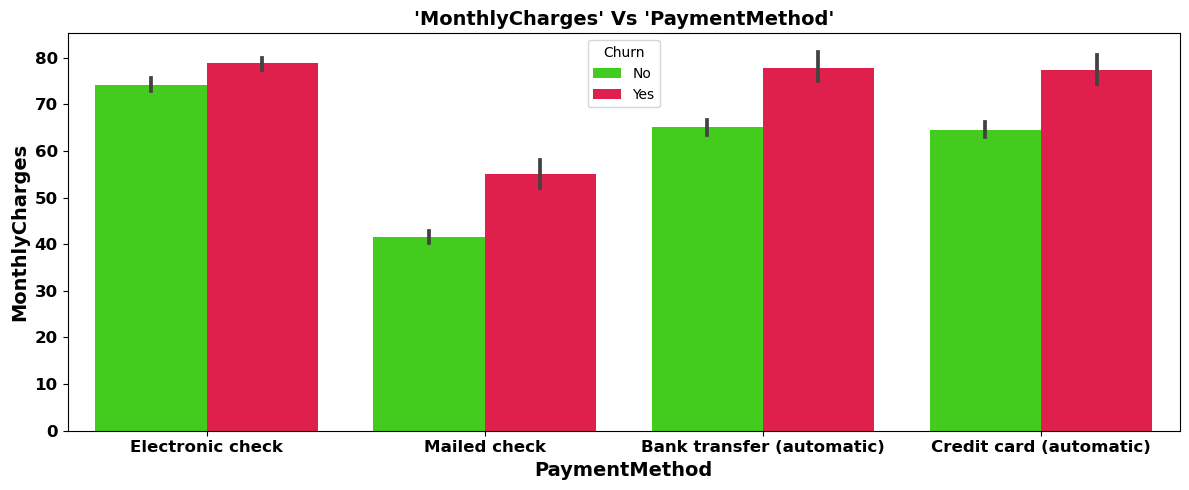

In [62]:
plt.figure(figsize=(12,5))
sns.barplot(y='MonthlyCharges',x='PaymentMethod',data=df,hue='Churn', palette='prism')
plt.title("'MonthlyCharges' Vs 'PaymentMethod'",fontsize=14, fontweight='bold')
plt.ylabel('MonthlyCharges', fontsize=14,fontweight='bold')
plt.xlabel('PaymentMethod', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **customers who are satisfied with their payment method and find it convenient and reliable may be more likely to continue using its services.**

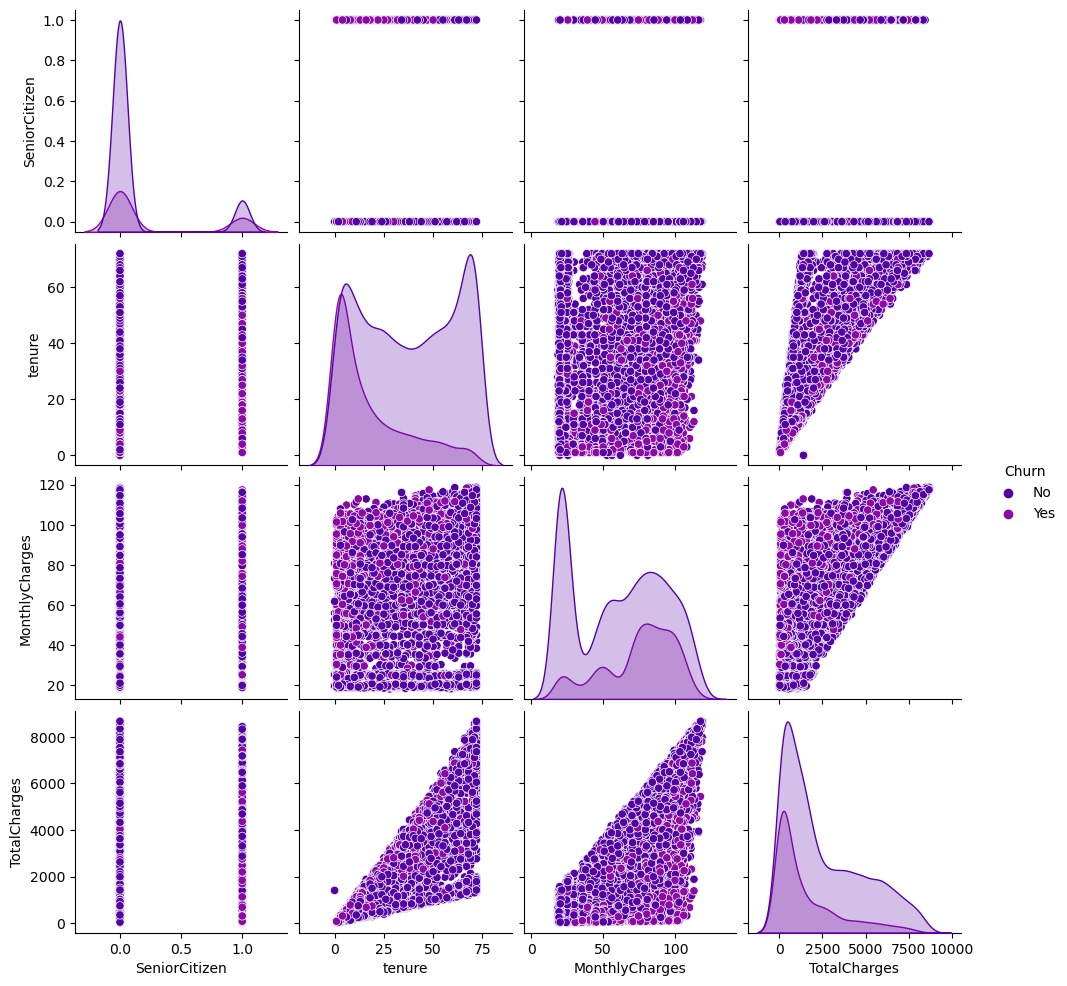

In [63]:
sns.pairplot(df, hue='Churn')

# Encoding of categorical features:

In [64]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate LabelEncoder
mappings = {}
for i in df_categorical:
    df[i] = le.fit_transform(df[i])
    
    if i=="Churn":
    # print the mapping of categories to integers for the current column
        print(f"{i}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
df.head()

Churn: {'No': 0, 'Yes': 1}


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [65]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges']}

# Checking coefficients of correlation (r)

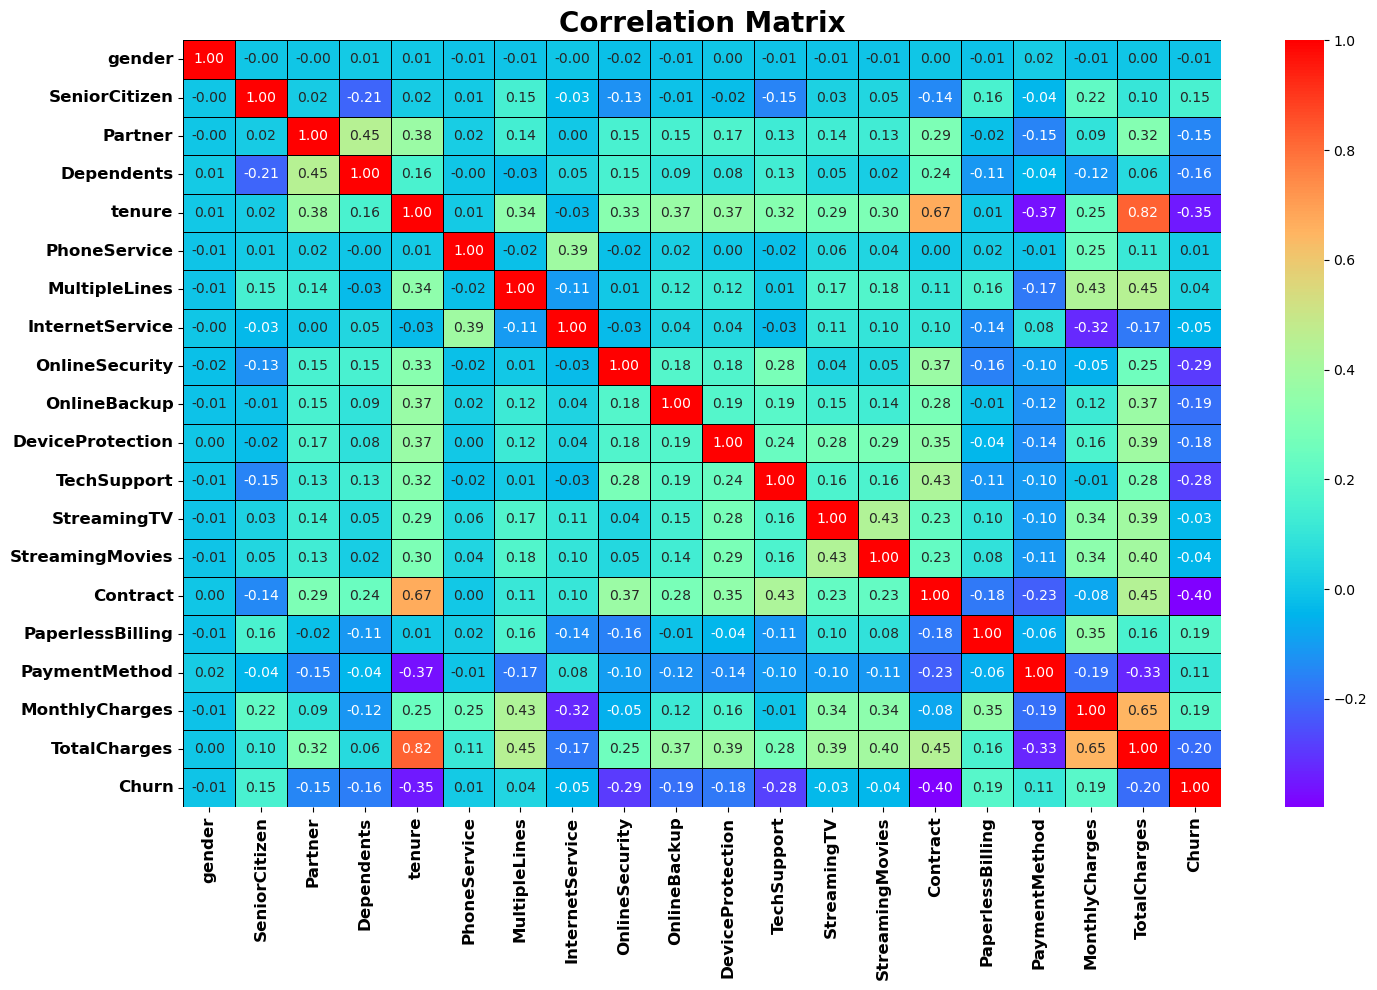

In [66]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

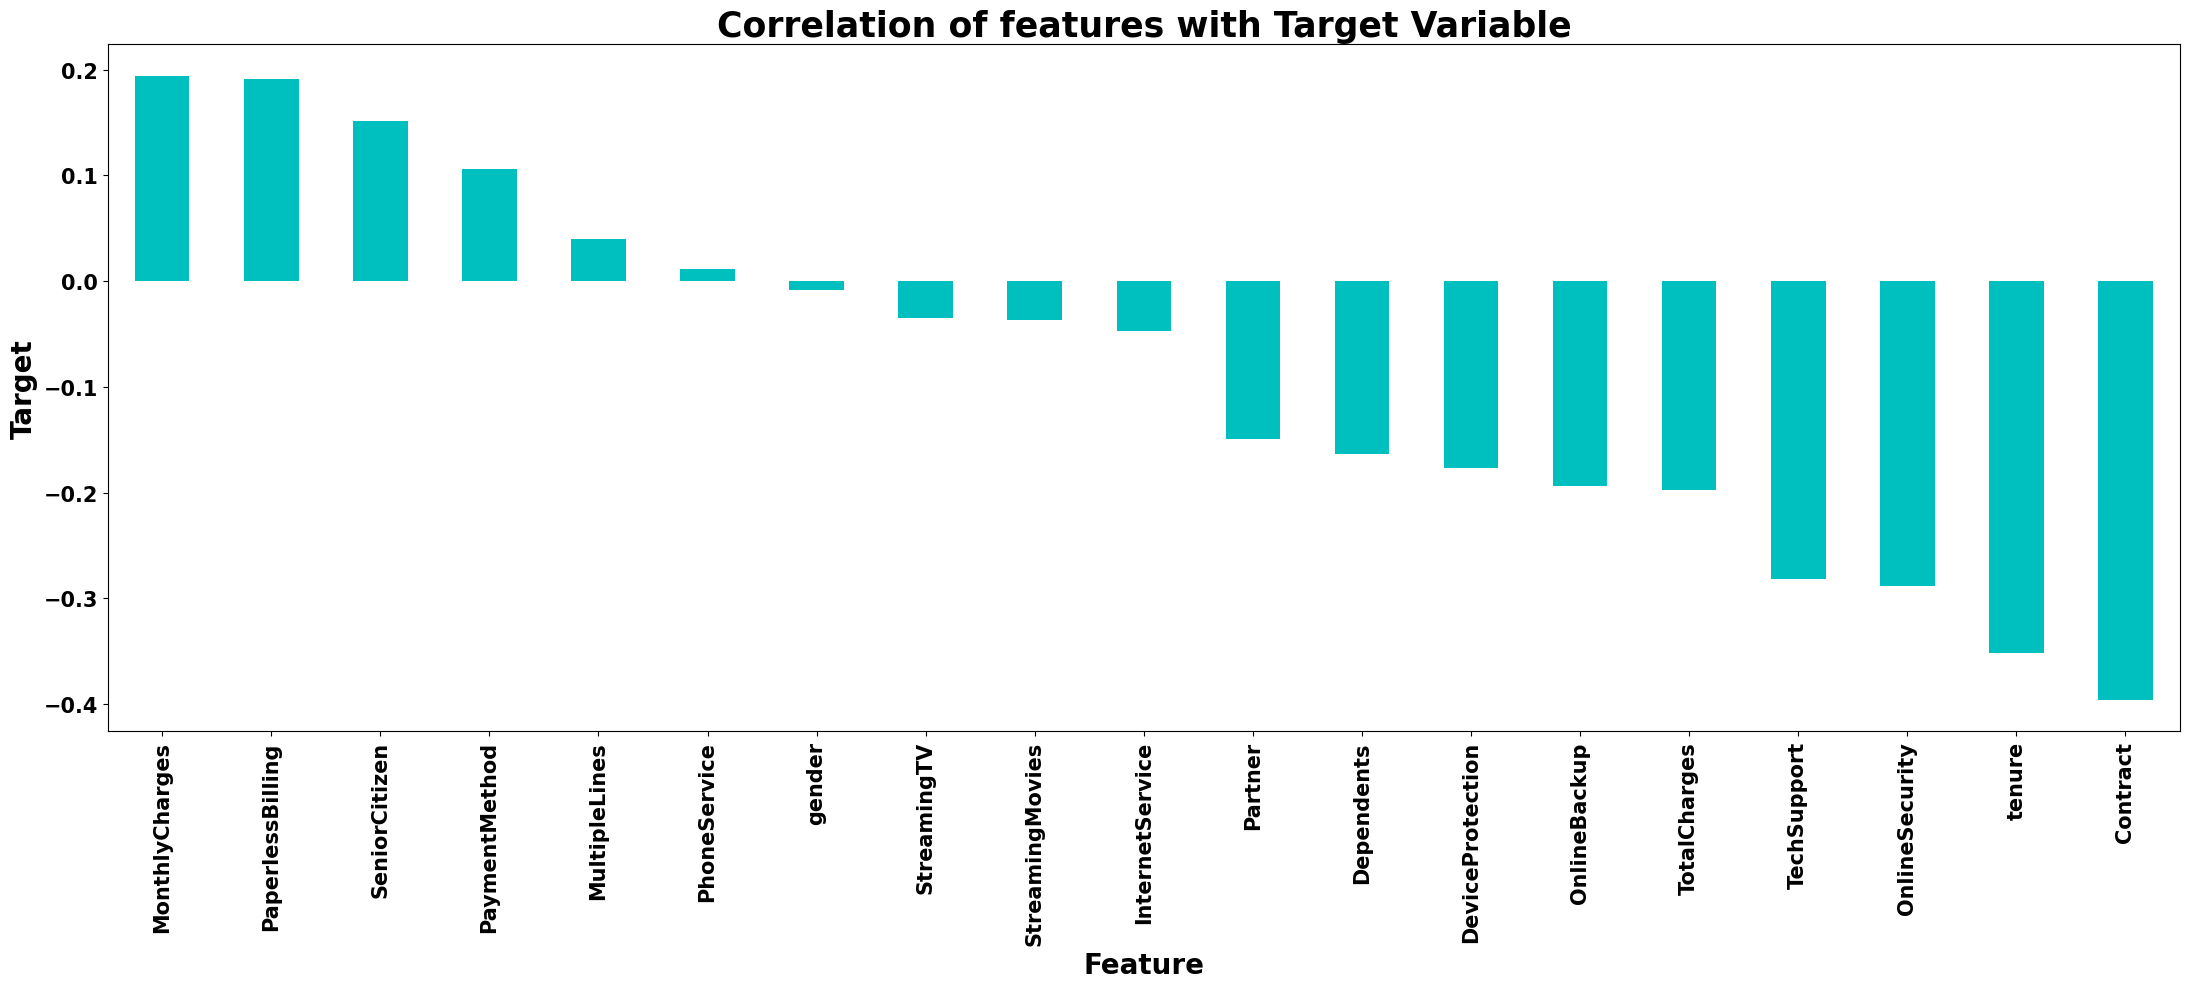

In [67]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [68]:
corr_r['Churn'].sort_values(ascending=False) 

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.197914
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

#### Observations for target variable:
- **There are multiple features with weak and very weak corrleations**
- **Max +ve correlation: 'MonthlyCharges'** 
- **Max -ve correlation: 'Contract'**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation**
- **Considering -0.01 to 0.01 range as very weak correlation with target variable. Idenfied features within this range are Gender,PhoneService**
- **I will check feature scores from SelectKBest algorithm with f_classif and also will check using Feature Importance with ExtraTreeClassifier, then I will take a decision on dropping features from the dataset**

# Checking top features using SelectKBest algorithm

In [69]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif            # SelectKBest algorithm with ANOVA F-value

x=df.drop('Churn',axis=1)  #independent columns
y=df['Churn']  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs        Score
0           Contract  1309.552886
1             tenure   989.515082
2     OnlineSecurity   637.269769
3        TechSupport   604.784966
4       TotalCharges   286.143229
5     MonthlyCharges   275.993382
6       OnlineBackup   275.128573
7   PaperlessBilling   265.441296
8   DeviceProtection   226.402747
9         Dependents   192.687978
10     SeniorCitizen   165.150554
11           Partner   159.662083
12     PaymentMethod    80.124746
13   InternetService    15.782874
14     MultipleLines    11.347148
15   StreamingMovies     9.359535
16       StreamingTV     8.408374
17      PhoneService     0.899975
18            gender     0.538979

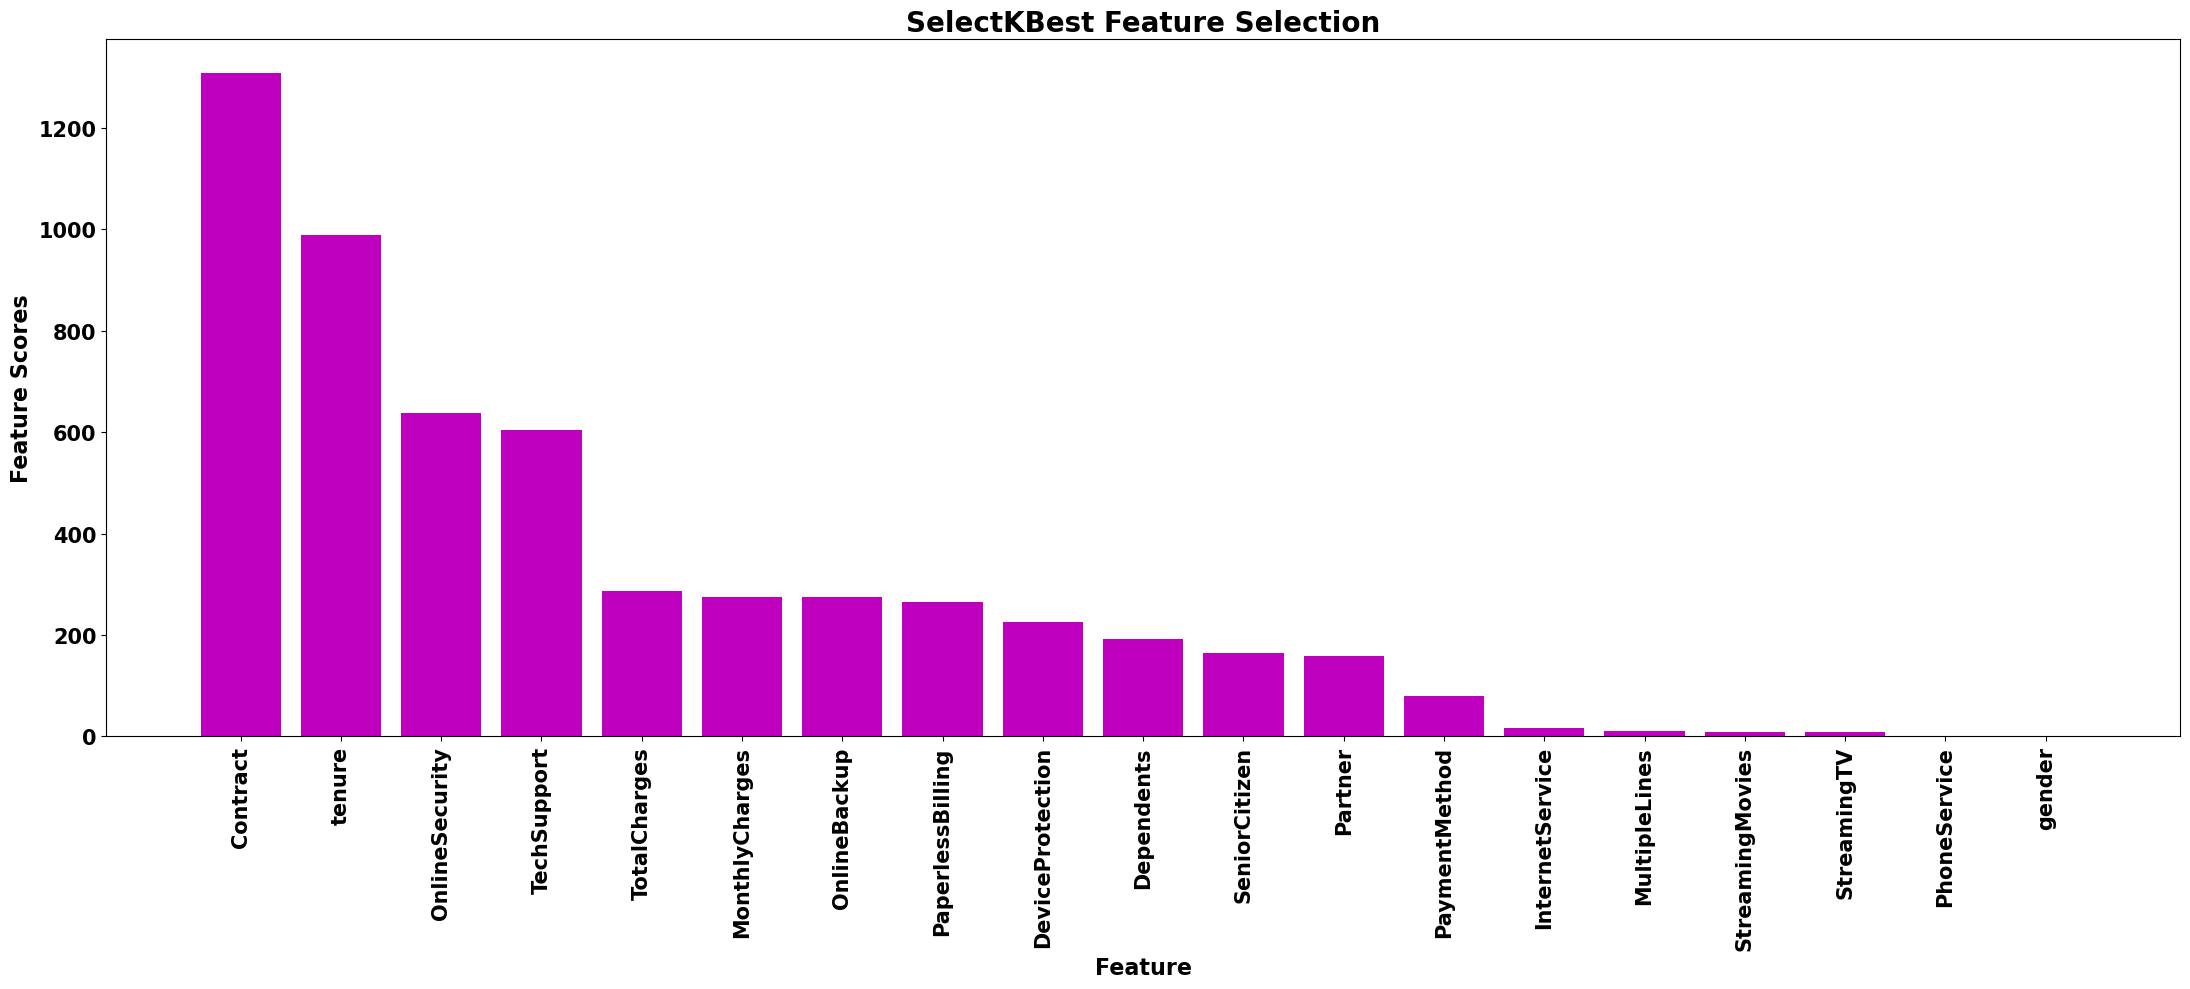

In [70]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **6 Features with least score based on selectKbest algorithm are gender,PhoneService,StreamingTV,StreamingMovies,MultipleLines,InternetService**

# Checking top features using Feature Importance - Extra Tree Classifier

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0             tenure  0.152169
1       TotalCharges  0.149423
2     MonthlyCharges  0.138234
3           Contract  0.078263
4      PaymentMethod  0.063362
5        TechSupport  0.049154
6     OnlineSecurity  0.044894
7             gender  0.037410
8    InternetService  0.035137
9       OnlineBackup  0.031449
10  DeviceProtection  0.030807
11           Partner  0.030090
12  PaperlessBilling  0.029080
13     MultipleLines  0.027056
14     SeniorCitizen  0.026636
15        Dependents  0.023880
16       StreamingTV  0.023485
17   StreamingMovies  0.022937
18      PhoneService  0.006534

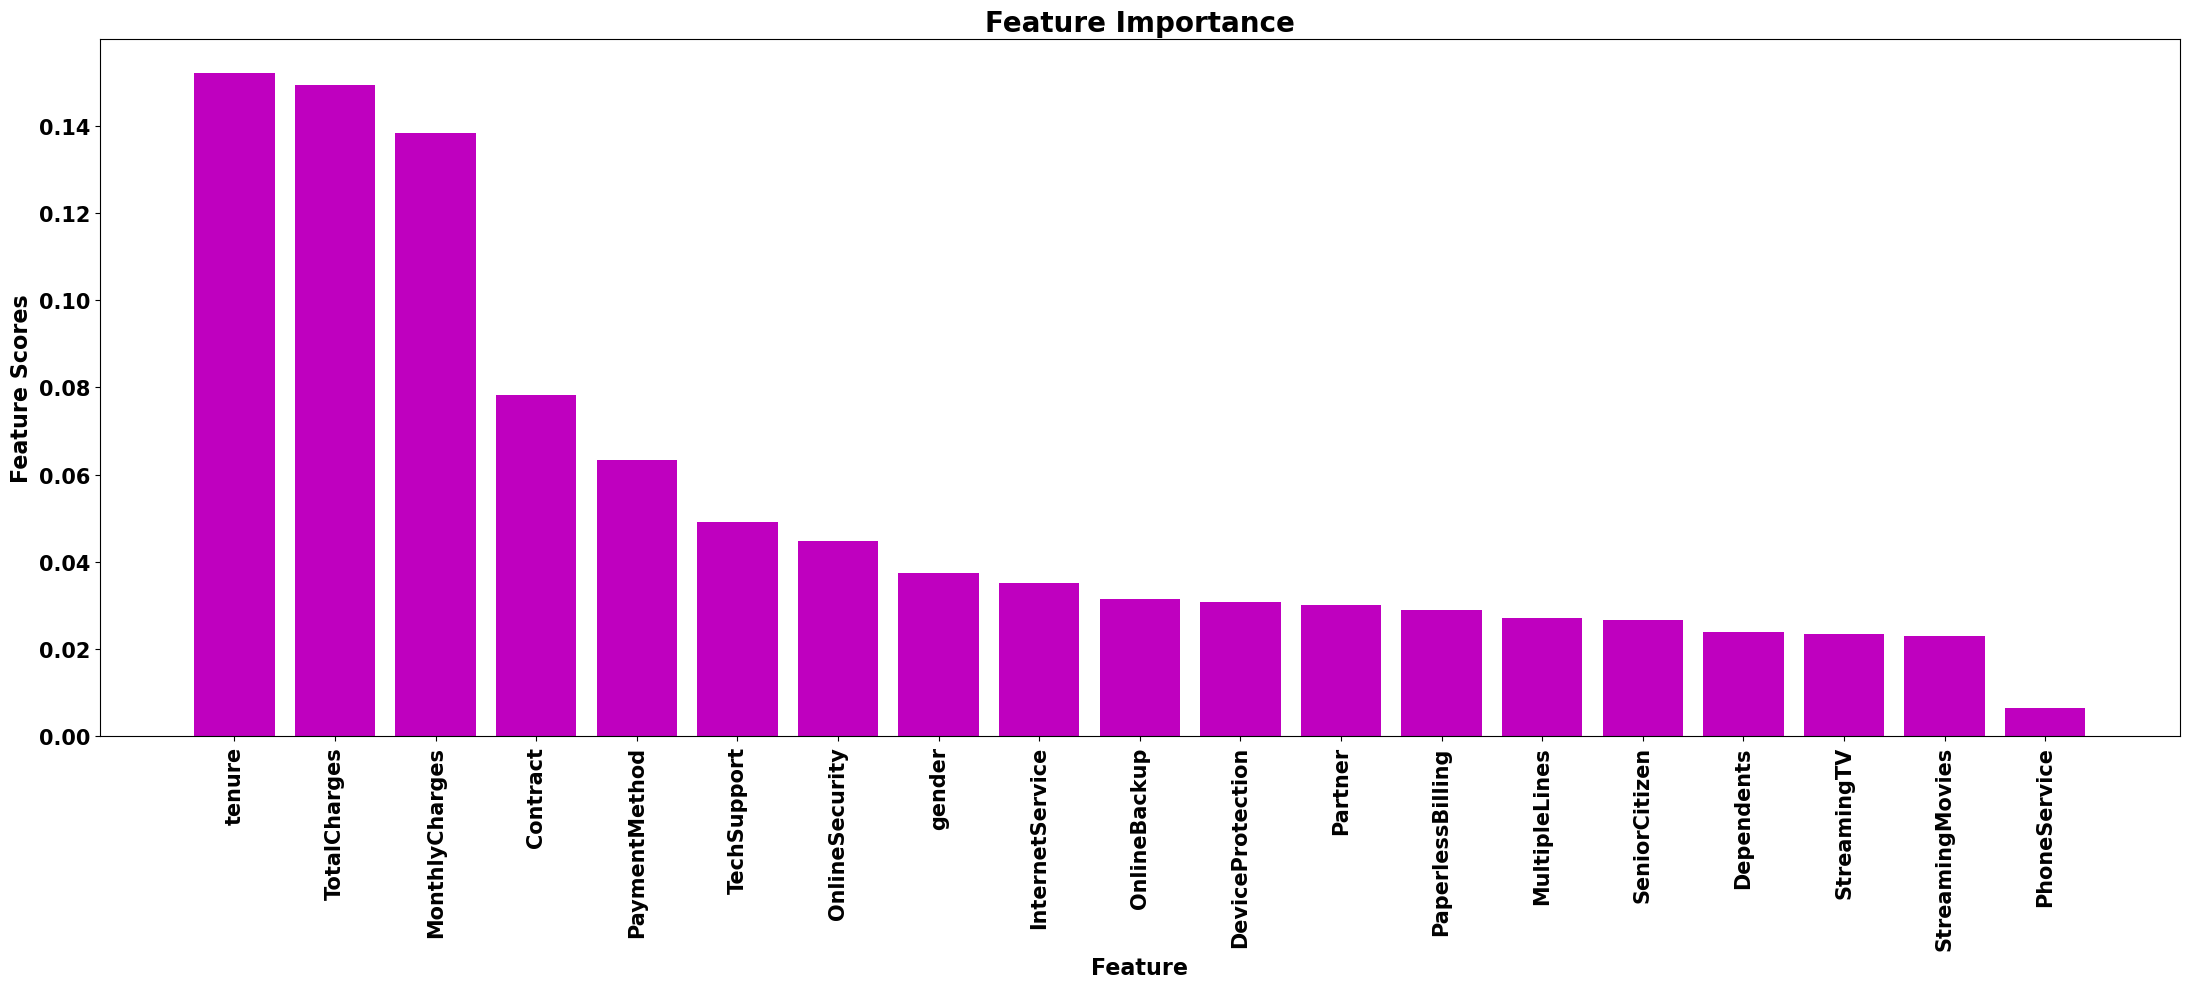

In [72]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **4 Features with least score based on Feature Importance with Extra Tree Classifier are PhoneService,StreamingTV,StreamingMovies,MultipleLines**
- **As PhoneService,StreamingTV,StreamingMovies,MultipleLines are the features with lowest scores coming in all checked feature selection techniques, hence dropping these two columns from the dataset**

In [73]:
df.drop(['PhoneService','StreamingTV','StreamingMovies','MultipleLines'],axis=1, inplace=True)
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0       0              0        1           0       1                0   
1       1              0        0           0      34                0   
2       1              0        0           0       2                0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [74]:
# We calculate VIF only for numerical data as the variance is applicable only for numerical data

In [75]:
# Identifying the columns with numerical data after dropping the columns identified in previous steps

In [76]:
df_numerical.shape

(7021, 3)

In [77]:
# Looping to get the list of numerical variables left in the dataset after dropping columns based on previous steps
df_num_filter=[]
for i in df_numerical.columns:
    for j in df.columns:
        if i==j:
            df_num_filter.append(i)
print(len(df_num_filter))
display(df_num_filter)

3


['tenure', 'MonthlyCharges', 'TotalCharges']

In [78]:
df_vif=df[df_num_filter]
df_vif.head(5)

tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

In [79]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_vif[list(df_vif.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF          Column
2  8.080404    TotalCharges
0  6.321809          tenure
1  3.368531  MonthlyCharges

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As VIF values < 10 for all the numerical features, there is no multi-collinearity in the dataset**

# Checking Outliers

In [80]:
# We check outliers on numerical data
df_outliers=df_vif.copy()
df_outliers.head(5)

tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

In [81]:
df_outliers.shape

(7021, 3)

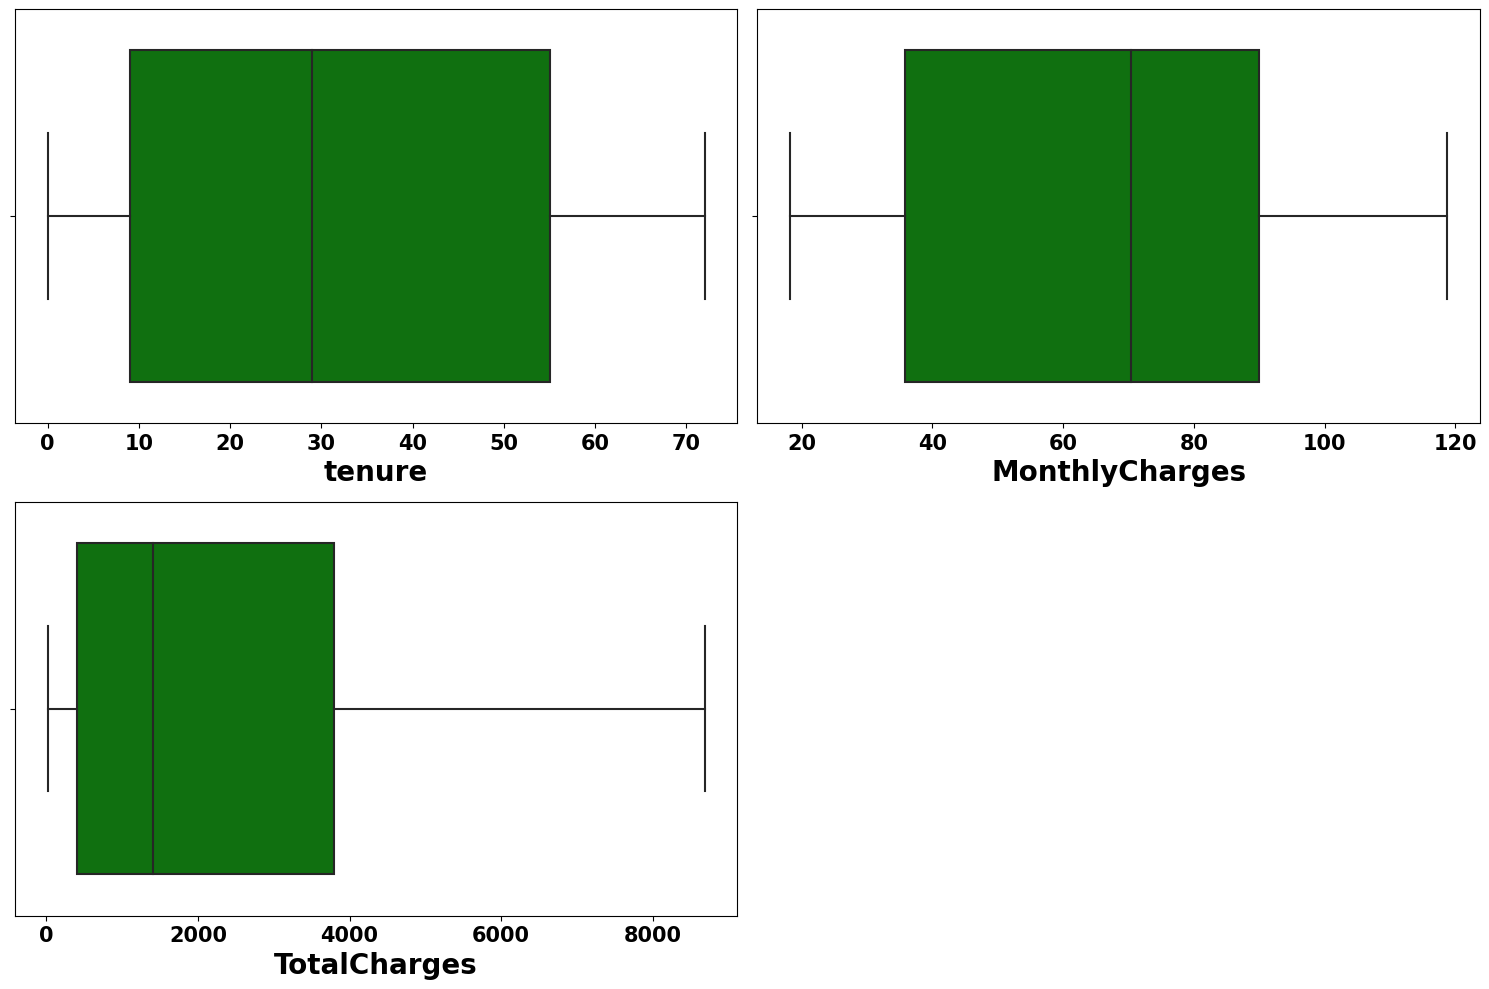

In [82]:
# Checking outliers visually
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=20:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **No Outliers are present in the dataset**

In [83]:
df_outliers.shape

(7021, 3)

In [84]:
df.shape

(7021, 16)

In [85]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

#### Observations:
- **We can see an empty array. Hence,no Outliers are present in any columns with the given Z score threshold**

In [86]:
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0       0              0        1           0       1                0   
1       1              0        0           0      34                0   
2       1              0        0           0       2                0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1

In [87]:
x=df.drop(['Churn'],axis=1)
y=df['Churn'].copy()

# Skewness Check

In [88]:
df_outliers.shape

(7021, 3)

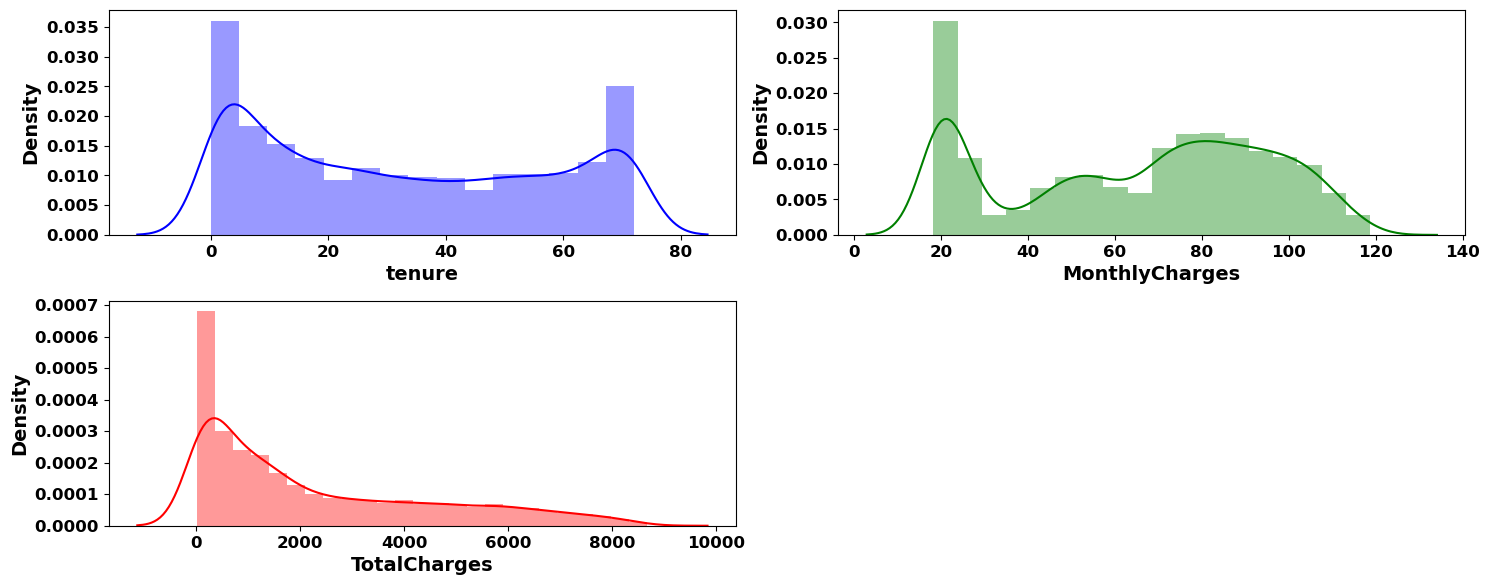

In [89]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_outliers.columns:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

In [90]:
df_outliers.skew().sort_values(ascending=False)

TotalCharges      0.960475
tenure            0.235542
MonthlyCharges   -0.224097
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there is one variable beyond this range**
- **I will apply various methods to remove skewness and will consider the one with lowest skewness**

# Transforming data to reduce skewness

In [91]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_outliers)
x_tra=pd.DataFrame(data=x_pwr,columns=df_outliers.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

TotalCharges     -0.143263
tenure           -0.243646
MonthlyCharges   -0.259855
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**

In [92]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_outliers)
x_qtr=pd.DataFrame(data=x_qt,columns=df_outliers.columns)
x_qtr.skew().sort_values(ascending=False)

tenure            0.026656
MonthlyCharges    0.000021
TotalCharges     -0.000031
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method**
- **QuantileTransformer has reduced skewness better than PowerTransformer, hence using the data from quantile transformer**

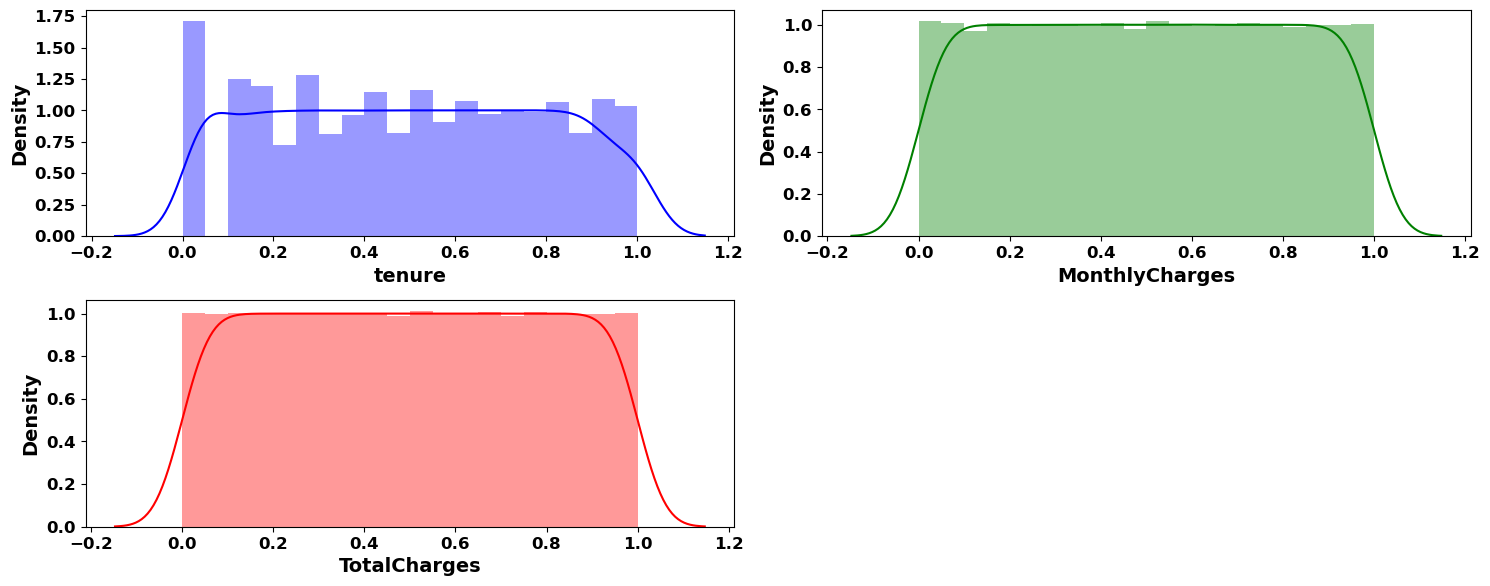

In [93]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Grouping both transformed numerical and categorical data 

In [94]:
x.shape

(7021, 15)

In [95]:
#here transformed numerical data is assigned to original data set
for i in x_qtr.columns:
    x[i]=x_qtr[i]
x.head()

gender  SeniorCitizen  Partner  Dependents    tenure  InternetService  \
0       0              0        1           0  0.043544                0   
1       1              0        0           0  0.548549                0   
2       1              0        0           0  0.102603                0   
3       1              0        0           0  0.647648                0   
4       0              0        0           0  0.102603                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   
3               2             0                 2            2         1   
4               0             0                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2        0.232500      0.026935  
1                 0              3        0.392798      0.580849  
2                 1              3        0.353743      0.116667  
3                 0              0        0.267204      0.573305  
4                 1              2        0.506006      0.138520

In [96]:
x.shape

(7021, 15)

In [97]:
x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

In [98]:
new_x=x

# Scaling data

In [99]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

gender  SeniorCitizen   Partner  Dependents    tenure  InternetService  \
0 -1.008726      -0.440508  1.031400   -0.655475 -1.574066        -1.181531   
1  0.991349      -0.440508 -0.969556   -0.655475  0.162433        -1.181531   
2  0.991349      -0.440508 -0.969556   -0.655475 -1.370987        -1.181531   
3  0.991349      -0.440508 -0.969556   -0.655475  0.503194        -1.181531   
4 -1.008726      -0.440508 -0.969556   -0.655475 -1.370987         0.175278   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0       -0.918456      1.240410         -1.027886    -0.924901 -0.830396   
1        1.405320     -1.029902          1.242972    -0.924901  0.368496   
2        1.405320      1.240410         -1.027886    -0.924901 -0.830396   
3        1.405320     -1.029902          1.242972     1.394288  0.368496   
4       -0.918456     -1.029902         -1.027886    -0.924901 -0.830396   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0          0.829057       0.402156       -0.926408     -1.638501  
1         -1.206190       1.338965       -0.371217      0.280038  
2          0.829057       1.338965       -0.506483     -1.327705  
3         -1.206190      -1.471460       -0.806210      0.253910  
4          0.829057       0.402156        0.020878     -1.252015

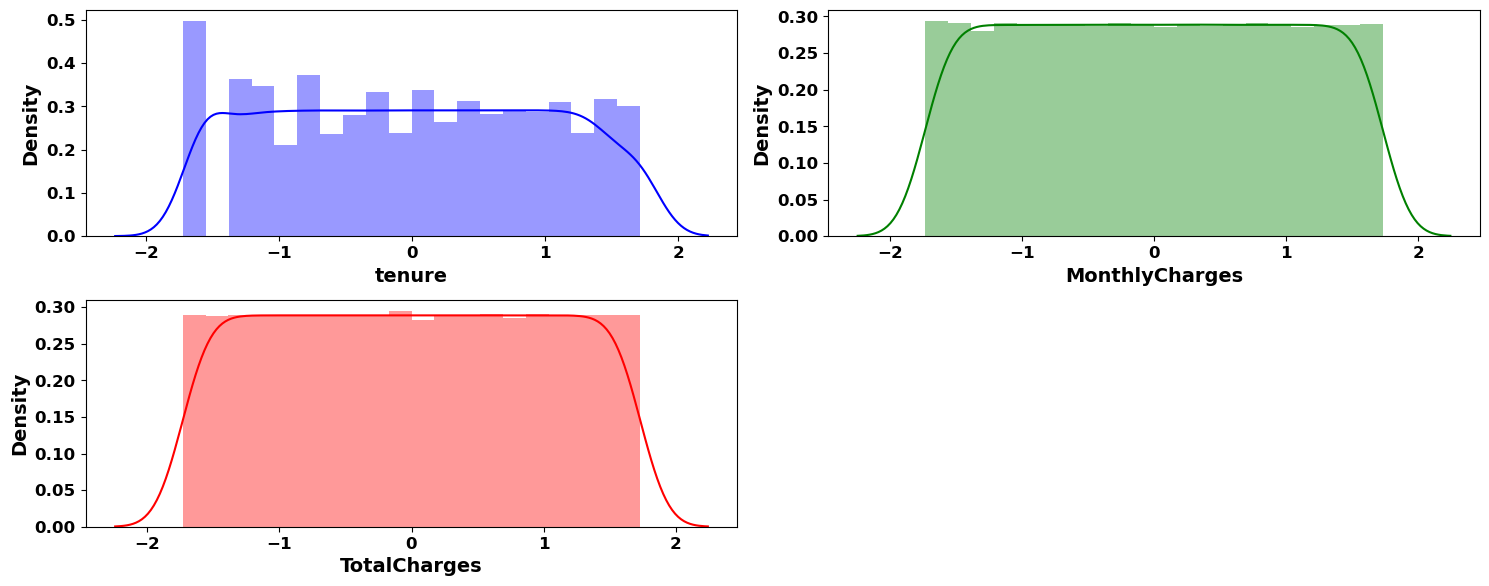

In [100]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observation:
- **We can see the plots after applying scaling with reduced skewness**

# SMOTE for classfication

- **As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable**

In [101]:
# Checking the value count of target column
y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [102]:
x.shape

(7021, 15)

In [103]:
y.shape

(7021,)

In [104]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [105]:
# Checking the value count of target column
y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

In [106]:
x.shape

(10328, 15)

In [107]:
y.shape

(10328,)

0    5164
1    5164
Name: Churn, dtype: int64


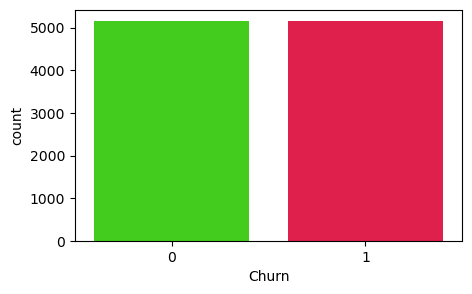

In [108]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

#### Observations: 
- **Classes are balanced in the target column**

# Model Building - Binary Classification

In [109]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

### Finding Best Random State

Best random state: 321, Best accuracy: 80.35


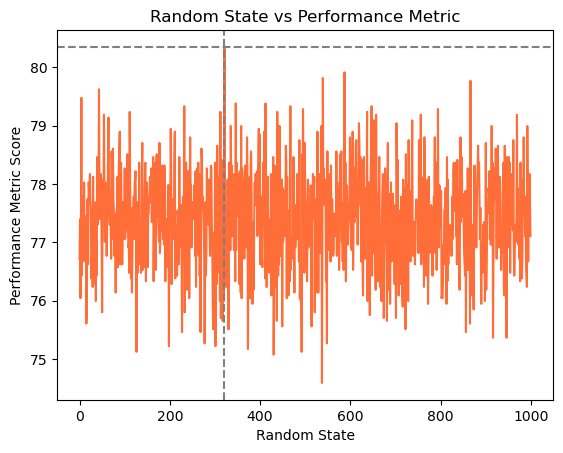

In [110]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, classification_report, roc_curve


lr=LogisticRegression()  # Defining instance for logisticregression

# Initialize empty lists for storing the random state values and the performance metric scores
random_states = []
scores = []

# Split the data into train and test sets for different random states
best_score = 0
best_random_state = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i,stratify=y)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    # Append the random state value and the performance metric score to the lists
    random_states.append(i)
    scores.append(score*100)
    if score > best_score:
        best_score = score
        best_random_state = i

print(f"Best random state: {best_random_state}, Best accuracy: {round((best_score*100),2)}")

# Plot the line chart
plt.plot(random_states, scores)
plt.xlabel('Random State')
plt.ylabel('Performance Metric Score')
plt.title('Random State vs Performance Metric')
# Add dashed lines
plt.axhline(y=max(scores), linestyle='--', color='gray')
plt.axvline(best_random_state, linestyle='--', color='gray')
plt.show()

In [111]:
# Best Random State
BRS=best_random_state
BRS

321

#### Observations: 
- **From the above plot, best random state is 321 where testing accuracy is high. This random state will be used for buidling all classification models**

In [112]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS,stratify=y)

In [113]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
y_prob = lr.predict_proba(x_test)

accu_score=accuracy_score(y_test,pred_test)
print("Accuracy Score:",round(accuracy_score(y_test,pred_test)*100,1))
f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

Accuracy Score: 80.3
F1 Score: 80.3
Precision Score: 80.6
Recall Score: 80.3
ROC AUC Score: 87.6
AUC PR Score: 86.1


In [114]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1033
           1       0.78      0.84      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



In [115]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[788 245]
 [161 872]]


# Cross Validation for Logistic Regression

- **Finding the best no. folds where the delta is least between cross validation and model scores.**

Model score: 80.3485
CV score with 2 folds: 77.3335
CV score with 3 folds: 77.2561
CV score with 4 folds: 77.3238
CV score with 5 folds: 77.4208
CV score with 6 folds: 77.3144
CV score with 7 folds: 77.3337
CV score with 8 folds: 77.2560
CV score with 9 folds: 77.2757
CV score with 10 folds: 77.3046
Best number of folds: 5


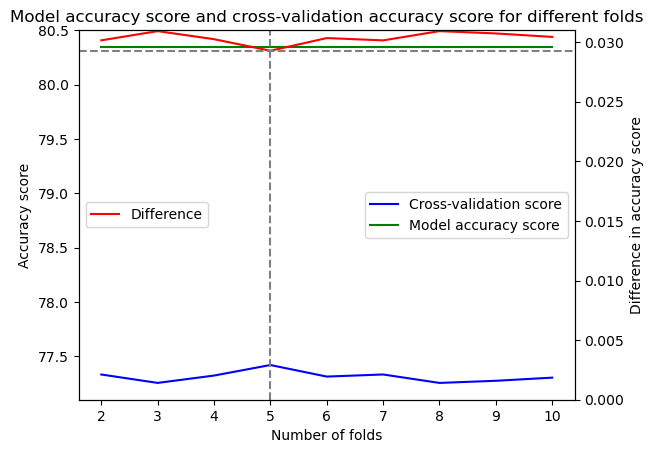

In [116]:
from sklearn.model_selection  import cross_val_score

pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

folds_range = range(2, 11)

for j in folds_range:
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))

# Find the best number of folds based on smallest difference between cross-validation score and model score

best_n_folds = folds_range[np.argmin(Difference)]

# Print the results
print("Model score: {:.4f}".format(lss*100))
for n_folds, cv_score in zip(folds_range, CV_Score):
    print("CV score with {} folds: {:.4f}".format(n_folds, cv_score))
print("Best number of folds: {}".format(best_n_folds))

# plot cross-validation scores and model scores for each number of folds
fig, ax1 = plt.subplots()
ax1.plot(No_of_Folds, CV_Score, label='Cross-validation score', color='blue')
ax1.plot(No_of_Folds, Model_Score, label='Model accuracy score', color='green')
ax1.set_xlabel('Number of folds')
ax1.set_ylabel('Accuracy score')

ax2 = ax1.twinx()
ax2.plot(No_of_Folds, Difference, label='Difference', color='red')
ax2.set_ylabel('Difference in accuracy score')
ax2.set_ylim(bottom=0)

# Add dashed lines
ax1.axvline(best_n_folds, linestyle='--', color='gray')
ax2.axhline(min(Difference), linestyle='--', color='gray')

plt.title('Model accuracy score and cross-validation accuracy score for different folds')
ax1.legend(loc='center right')
ax2.legend(loc='center')
plt.legend(['Difference'], loc='center left')
plt.show()

In [117]:
# Getting the best no. of folds where the least difference between cross validation score and model score
BCV=best_n_folds
BCV

5

#### Observations: 
- **Considered the no. folds where the delta is least between cross validation and model scores. In this case, selected CV=5**

In [118]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore = cross_val_score(lr, x, y, cv=BCV)
lsscore_selected = lsscore.mean()

print("CV accuracy scores for each fold are: ", lsscore*100)
print("Mean CV accuracy score:", round(lsscore_selected*100,1))
print("Model accuracy score:", round(lss*100,1))
print("Difference in Accuracy Scores:", round(lss-lsscore_selected,5))

f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [76.47628267 76.33107454 77.83155857 78.4503632  78.01452785]
Mean CV accuracy score: 77.4
Model accuracy score: 80.3
Difference in Accuracy Scores: 0.02928
F1 Score: 80.3
Precision Score: 80.6
Recall Score: 80.3
ROC AUC Score: 87.6
AUC PR Score: 86.1


# Other Classification Algorithms

In [119]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier(loss='log')),
        ('SVC()',SVC(probability=True)),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining empty lists
Model=[lr]
CV_Score=[round(lsscore_selected*100,1)]
Model_Score=[round(lss*100,1)]
Difference=[abs(lss-lsscore_selected)]
F1_Scores=[round(f1_Score_sel*100,1)]
precision_scores=[round(precision_score_sel*100,1)]
recall_scores=[round(recall_score_sel*100,1)]
roc_auc_scores=[round(roc_auc_score_sel*100,1)]
pr_auc_scores=[round(pr_auc*100,1)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:    
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(round(accuracy_score(y_test,pred_test)*100,1))  # Appending "Accuracy score" to the list
    F1_Scores.append(round(f1_score(y_test,pred_test, average='weighted')*100,1))  # Appending "F1 score" to the list
    precision_scores.append(round(precision_score(y_test,pred_test, average='weighted')*100,1))  # Appending "precision score" to the list
    recall_scores.append(round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Appending "recall score" to the list
    
    y_prob = model[1].predict_proba(x_test)
    roc_auc_scores.append(round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))  # Appending "roc auc score" to the list
    pr_auc_scores.append(round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))  # Appending "auc pr score" to the list
    
    print('\n')
    print('\033[1m'+'Metrics for Model:', model[0], ':'+'\033[0m\n')
    print("Accuracy Score:", round(accuracy_score(y_test,pred_test)*100,1))               # Printing "accuracy_score"
    print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))        # Printing "f1_score"
    print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1)) # Printing "precision_score"
    print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Printing "recall_score"
    print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1)) # Printing "roc auc_score"
    print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1)) # Printing "auc_pr_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*80)    

    cvscore=cross_val_score(model[1],x,y,cv=BCV)               # Cross Validation score calculation for all folds
    score = cvscore.mean()                                     # Cross Validation mean score calculation      
    
    print('\033[1m'+'Cross Validation Score for Model:', model[0], ':'+'\033[0m\n')
    print("CV accuracy scores for each fold are: ", cvscore*100)
    print("Mean CV accuracy score:", round(score*100,1))
    print('\n')
    print('='*80)
    
    CV_Score.append(round(score*100,1))                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences

# Create a Pandas DataFrame to display the scores for each model
scores_df = pd.DataFrame({'Model': Model,
                          'Accuracy': Model_Score,
                          'CV score': CV_Score,
                          'F1-score': F1_Scores,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'AUC-ROC': roc_auc_scores,
                          'AUC-PR': pr_auc_scores,
                          'Difference in Accuracy Scores':Difference})

print("Table with performance of the models")
scores_df.sort_values(by=["Accuracy"],ascending=False)  # sorting the score table using the model score



Metrics for Model: GaussianNB() :

Accuracy Score: 78.2
F1 Score: 78.2
Precision Score: 78.5
Recall Score: 78.2
ROC AUC Score: 86.0
AUC PR Score: 84.0
Confusion Matrix:
[[759 274]
 [176 857]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1033
           1       0.76      0.83      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

--------------------------------------------------------------------------------
Cross Validation Score for Model: GaussianNB() :

CV accuracy scores for each fold are:  [76.37947725 75.50822846 76.37947725 77.19128329 75.64164649]
Mean CV accuracy score: 76.2




Metrics for Model: Decision Tree Classifier() :

Accuracy Score: 78.4
F1 Score: 78.4
Precision Score: 78.4
Recall Score: 78.4
ROC AUC Score: 78.7
AUC PR Score: 72.3
Confusion Matrix:
[[794 23

Model  Accuracy  CV score  F1-score  Precision  \
7         ExtraTreesClassifier()      87.9      86.0      87.9       88.0   
6       RandomForestClassifier()      86.8      84.7      86.8       86.9   
10               XGBClassifier()      86.1      83.2      86.1       86.1   
8   GradientBoostingClassifier()      85.3      82.9      85.3       85.5   
5                          SVC()      82.3      79.3      82.2       82.7   
9           AdaBoostClassifier()      82.0      81.0      81.9       82.4   
3         KNeighborsClassifier()      81.1      79.7      80.9       82.1   
0           LogisticRegression()      80.3      77.4      80.3       80.6   
4                SGDClassifier()      78.9      76.9      78.9       79.1   
2     Decision Tree Classifier()      78.4      78.1      78.4       78.4   
1                   GaussianNB()      78.2      76.2      78.2       78.5   

    Recall  AUC-ROC  AUC-PR  Difference in Accuracy Scores  
7     87.9     93.8    92.5                       0.019479  
6     86.8     93.7    92.9                       0.020931  
10    86.1     93.9    94.2                       0.028965  
8     85.3     93.0    92.7                       0.024710  
5     82.3     89.8    87.6                       0.030047  
9     82.0     90.9    90.0                       0.009906  
3     81.1     88.0    82.7                       0.013977  
0     80.3     87.6    86.1                       0.029277  
4     78.9     86.8    84.9                       0.020276  
2     78.4     78.7    72.3                       0.002648  
1     78.2     86.0    84.0                       0.019988

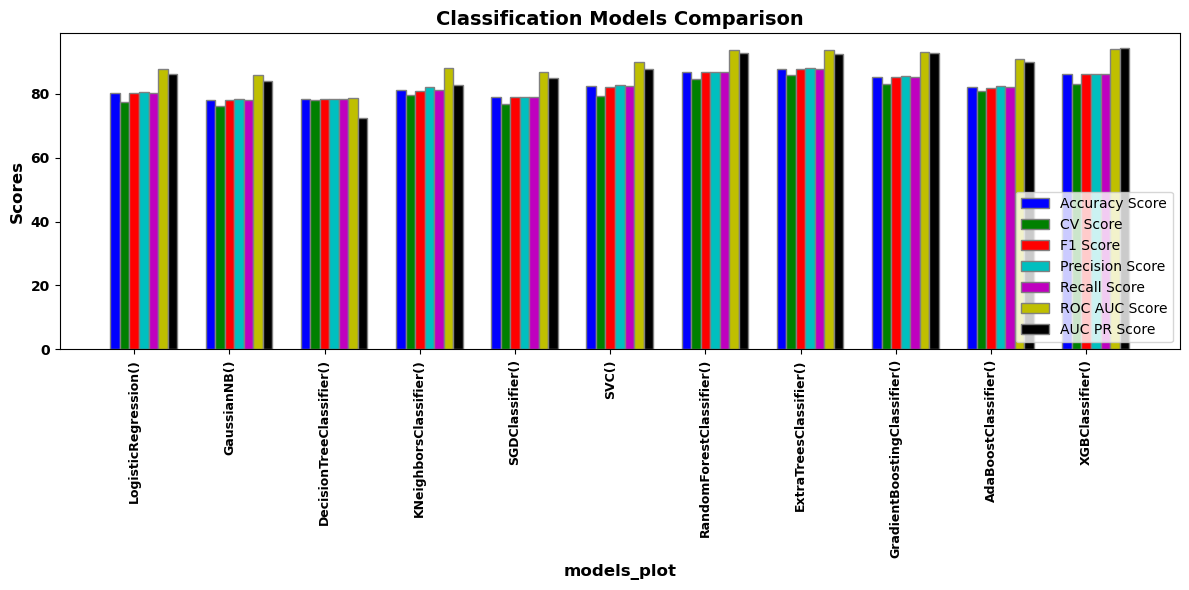

In [120]:
# Plotting all models_plot metrics
models_plot = ['LogisticRegression()','GaussianNB()','DecisionTreeClassifier()','KNeighborsClassifier()','SGDClassifier()',
               'SVC()','RandomForestClassifier()','ExtraTreesClassifier()','GradientBoostingClassifier()','AdaBoostClassifier()',
               'XGBClassifier()']

barWidth = 0.1 # set width of bars

# set heights of bars
accu_bar = Model_Score
cv_bar = CV_Score
f1_bar = F1_Scores
precision_bar = precision_scores
recall_bar = recall_scores
roc_auc_bar = roc_auc_scores
pr_auc_bar = pr_auc_scores

# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]
pos6 = [x + barWidth for x in pos5]
pos7 = [x + barWidth for x in pos6]

# define colors for each bar
#colors = ['crimson','blue','green', 'yellow', 'magenta']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(12,6))

# create bar plots with defined colors
ax.bar(pos1, accu_bar, color=colors[0], width=barWidth, edgecolor='grey', label='Accuracy Score')
ax.bar(pos2, cv_bar, color=colors[1], width=barWidth, edgecolor='grey', label='CV Score')
ax.bar(pos3, f1_bar, color=colors[2], width=barWidth, edgecolor='grey', label='F1 Score')
ax.bar(pos4, precision_bar, color=colors[3], width=barWidth, edgecolor='grey', label='Precision Score')
ax.bar(pos5, recall_bar, color=colors[4], width=barWidth, edgecolor='grey', label='Recall Score')
ax.bar(pos6, roc_auc_bar, color=colors[5], width=barWidth, edgecolor='grey', label='ROC AUC Score')
ax.bar(pos7, pr_auc_bar, color=colors[6], width=barWidth, edgecolor='grey', label='AUC PR Score')


# add labels and title
plt.title('Classification Models Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
# plt.legend()
plt.legend(fontsize='10', title_fontsize='10',loc="lower right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations: 
- **We can see that RandomForestClassifier() and ExtraTreesClassifier() gives us maximum Accuracy score, max f1 score and max scores for remaining metrics along with max cross-validation score compared to remaining models.**
- **Out of RandomForestClassifier() and ExtraTreesClassifier(); ExtraTreesClassifier() gives more accuracy score and more cross-validation score. Hence selected ExtraTreesClassifier() as the best model for Hyper Parameter Tuning**
- **Hyper parameter tuning will be pefromed for "ExtraTreesClassifier()**

## Hyper Parameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200,300]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [None,2,3,4,5,7,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [122]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [123]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Model Accuracy Score:")
print(round(acc*100,1))
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print("Classification Report:")
print(classification_report(y_test,pred))

Model Accuracy Score:
87.6
Confusion Matrix:
[[874 159]
 [ 98 935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1033
           1       0.85      0.91      0.88      1033

    accuracy                           0.88      2066
   macro avg       0.88      0.88      0.88      2066
weighted avg       0.88      0.88      0.88      2066



In [124]:
# Using best CV value and checking the cross validation score again to compare with model score
cvscores = cross_val_score(ht_model, x, y, cv=BCV)
score = cvscores.mean()
ms=accuracy_score(y_test,pred)
y_prob = ht_model.predict_proba(x_test)

print("CV accuracy scores for each fold are: ", cvscores*100)
print("Mean CV accuracy score:", round(score*100,1))
print("Model accuracy score:", round(ms*100,1))
print("Difference in Accuracy Scores:", round(ms-score,5))
print("F1 Score:",round(f1_score(y_test,pred, average='weighted')*100,1))
print("Precision Score:",round(precision_score(y_test,pred, average='weighted')*100,1))
print("Recall Score:",round(recall_score(y_test,pred, average='weighted')*100,1))
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [80.92933204 81.1713456  89.25459826 88.81355932 89.53995157]
Mean CV accuracy score: 85.9
Model accuracy score: 87.6
Difference in Accuracy Scores: 0.01619
F1 Score: 87.5
Precision Score: 87.7
Recall Score: 87.6
ROC AUC Score: 94.1
AUC PR Score: 92.8


### Observations for Hyper Parameter Tuning: 
- **Accuracy Score, F1 score and remainig metrics and Cross-validation score for the model with hyper parameters tuned is almost same as the model with default Parameters for ExtraTreesClassifier. ROC AUC score is slightly better for hyper parameters tuned model, hence considered the final model with hyper parameters tuned for saving**

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

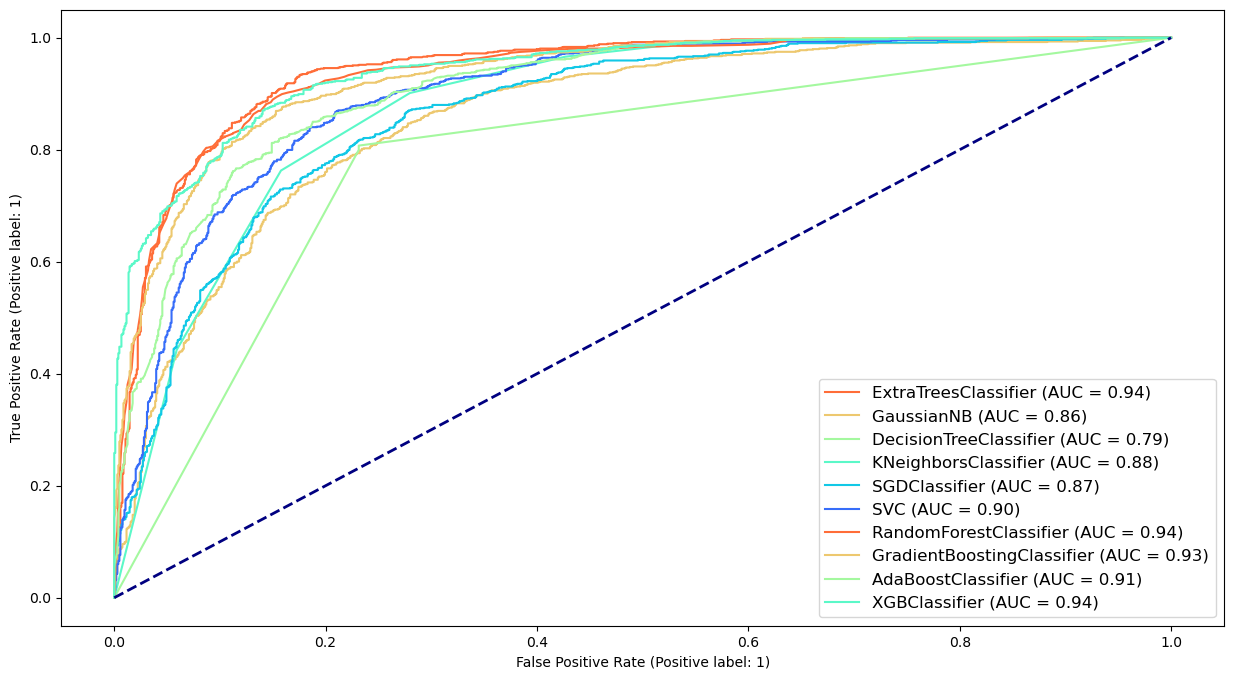

In [125]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 8)) # Set the figure size to 10 inches by 10 inches

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for Extra Trees Classifier which is best model identified so far
disp = plot_roc_curve(ht_model, x_test, y_test, ax=ax)

# Plotting the AUC ROC curve for remaining models with same axis of Extra Trees Classifier
plot_roc_curve(models[0][1], x_test, y_test, ax=ax)
plot_roc_curve(models[1][1], x_test, y_test, ax=ax)
plot_roc_curve(models[2][1], x_test, y_test, ax=ax)
plot_roc_curve(models[3][1], x_test, y_test, ax=ax)
plot_roc_curve(models[4][1], x_test, y_test, ax=ax)
plot_roc_curve(models[5][1], x_test, y_test, ax=ax)
# plot_roc_curve(models[6][1], x_test, y_test, ax=ax)
plot_roc_curve(models[7][1], x_test, y_test, ax=ax)
plot_roc_curve(models[8][1], x_test, y_test, ax=ax)
plot_roc_curve(models[9][1], x_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(prop={'size': 12}, loc='lower right')
plt.show()

#### Observations:
- **Many models are performing well.**
- **ExtraTreesClassifier, RandomForestClassifier and XGBClassifier are the best one among all models from this plot based on AUC ROC score** 
- **ExtraTreesClassifier from hyper parameter tuning is selected as the final model for deployment based on checking of all the metrics (Model Accuracy Score, cross validation score, F1 Score, Recall Score, Precision Score and ROC AUC Score)**

# Model Saving

In [126]:
import pickle
filename='Customer_Churn_Prediction.pkl'
pickle.dump(ht_model, open(filename,'wb'))  # saving the Extra Trees Classifier model

# Conclusion

In [127]:
loaded_model=pickle.load(open('Customer_Churn_Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Score:",result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head()

Model Score: 87.56050338818973


Predicted  Original
0          1         1
1          1         1
2          1         1
3          1         0
4          0         0

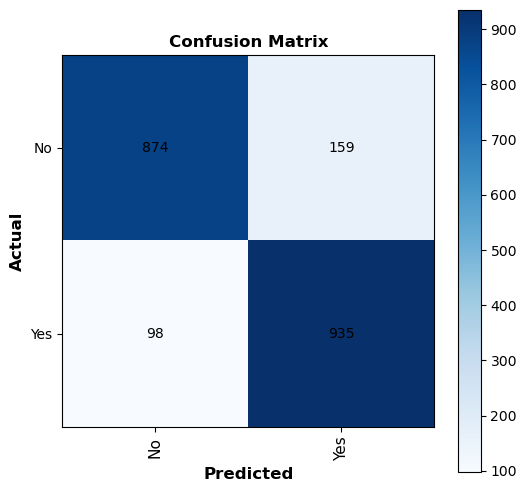

In [128]:
# Confusion Matrix for final saved model
pred=loaded_model.predict(x_test)
cm=confusion_matrix(y_test,pred)

# Target variable labels in the order
classes = ['No', 'Yes']

fig, ax = plt.subplots(figsize=(6, 6)) # create a figure and axis object
im = ax.imshow(cm, cmap='Blues')  # create a heatmap of the confusion matrix

# set axis labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xticks(fontsize=11,rotation=90)

# set labels for each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
ax.set_title("Confusion Matrix",fontsize=12,fontweight ='bold')
ax.set_xlabel('Predicted',fontsize=12,fontweight ='bold')
ax.set_ylabel('Actual',fontsize=12,fontweight ='bold')
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

#### Overall Summary:

- **First I had loaded the dataset and completed the Data Visualization based on the target variable (Churn).**

- **Then, I proceeded further with Exploratory Data Analysis and prepared the model for training and testing**

- **Tested multiple classification algorithms including ensemble techniques and based on the values of different metrics, I have considered  ExtraTreesClassifier as the best performing model among all algorithms**

- **After finding out the best model, I tried to increase the score by using Hyperparameter Tuning technique and the score is almost same as the model with default parameters with slight increase in ROC AUC Score hence considered the final model with hyper paramters tuned.**

- **The final model is saved as pickle file**